# Task part №1 content

***(Assignment (you can start on Dec, 10)***

***!!!Carry out an expolaratory data analysis!!!***

1. Check for missing values. If there are any, you should decide what to do with them:

* Usually, if most of the data (>60%) in the column is missing and the column is not crucial for modelling, you can just delete it. 

You can replace the missing data with:
- a measure of the central tendency over the entire column
- a measure of the central tendency within the group
- a random element

**Quantitative data**:
- **Continuous**
  - Symmetric distribution:
    - replace with **median**/mean
  - Asymmetric distribution:
    - replace with median
- **Discrete**
  - replace with mode / average

**Categorical data**:
  - replace with mode
  
Another option is to create a separate model and use it for predicting missing values.

2. Carry out univariate analysis. Use .describe(), vizualization and other methods to check out the distribution of the columns. Are there any outliers? If there are, you can drop them or replace them similarly to missing values. There are also a bunch of other methods to work with outliers, feel free to do more research!

3. Carry out multivariate analysis. For example, you can use scatter plots and a correlation matrix. *Side note: keep in mind that correlation only checks for linear dependencies. If the correlation is small, it doesn't mean that there is no dependency at all, only that there is no **linear** dependency.*

4. Use grouping (.group), filterings (for example, like this ``df[df[col] > df[col].quantile(.95)]``), vizualizations to formulate different hypothesis about the data. For example, maybe loyal customers are usually business travelers? Check it out! Don't forget to write down your conclusions.

The grade for this part will be based on:
1. Completing the plan above (2 points)
2. Cleanliness of your code and formatting of jupyter notebook: It should be filled with comments to your code and conclusions to your research, so we can understand follow your ideas. You should also strive to demonstrate your pandas knowledge and use as much methods from the lecture as possible (3 points)
3. How full your EDA is: imagine that this is a real-life project for your job. Try to test as many interesting and useful to business hypothesis as possible. You will get a higher grade for this criteria if you present a detailed and useful analysis, rather than just checking random correlations. (10 points)

# Dataset description

* **Gender**: Gender of the passengers (Female, Male)

* **Customer Type**: The customer type (Loyal customer, disloyal customer)

* **Age**: The actual age of the passengers

* **Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)

* **Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

* **Flight distance**: The flight distance of this journey

* **Inflight wifi service**: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

* **Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient

* **Ease of Online booking**: Satisfaction level of online booking

* **Gate location**: Satisfaction level of Gate location

* **Food and drink**: Satisfaction level of Food and drink

* **Online boarding**: Satisfaction level of online boarding

* **Seat comfort**: Satisfaction level of Seat comfort

* **Inflight entertainment**: Satisfaction level of inflight entertainment

* **On-board service**: Satisfaction level of On-board service

* **Leg room service**: Satisfaction level of Leg room service

* **Baggage handling**: Satisfaction level of baggage handling

* **Check-in service**: Satisfaction level of Check-in service

* **Inflight service**: Satisfaction level of inflight service

* **Cleanliness**: Satisfaction level of Cleanliness

* **Departure Delay in Minutes**: Minutes delayed when departure

* **Arrival Delay in Minutes**: Minutes delayed when Arrival

* **Satisfaction**: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

*Source: kaggle.com*

# Load lib

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import re

from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from numpy.random import RandomState
from scipy.sparse import csr_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, roc_curve, precision_recall_curve, confusion_matrix, average_precision_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

from catboost import CatBoostClassifier , cv, Pool
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

# Understending data

In [2]:
train = pd.read_csv('/Users/greygreywolf/Downloads/ML_bootcamp_task/train.csv')
test = pd.read_csv('/Users/greygreywolf/Downloads/ML_bootcamp_task/test.csv')

In [3]:
train.head(3)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [5]:
test.head(3)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

In [7]:
print(f'\nThere are {train.shape[0]} rows and {train.shape[1]} columns in our train data.')
print(f'\nThere are {train.shape[0]} rows and {test.shape[1]} columns in our test data.')


There are 103904 rows and 24 columns in our train data.

There are 103904 rows and 24 columns in our test data.


## Conclusion

**There are**
 - **103904 observations in the train `train` dataset.**
 -  **25976 observations in the `test` dataset.**
 
**The target variable is overall passenger satisfaction.**

___


**There are 15 categorical questions, with rating 0 to 5, and they pertain to the service quality of the flight experience. In addition, there are 3 more numeric features, Departure and Arrival Delay times in minutes, Flight distance. These 18 features could be factors that decribe the overall satisfaction of their flight experience.**

**There are also other features that describe the type of traveller, like age and gender, loyalty program, passenger seat class and flight distance.**
___
**Our task here is to predict satisfication lvl of passenger.**

**According to the target column that has 2 possible values - this is a binary classification problem.**

**Each row corresponds to one passenger, and each column to a specific feature.**

# Preprocessing

## Rename columns

***For ease of use, we will change the column names to the names corresponding to the pattern `snake_case`***

In [8]:
def give_correct_name_for_columns(df):
    
    print('\n===Old columns name===')
    print()
    print(df.columns)
    new_names = []
    old_names = df.columns
    for old_name in old_names:
        new_name = re.sub(r'[^\w]', '_', old_name).lower()
        new_names.append(new_name)
    print('\n\n=== New columns name=== \n\n', new_names)
    for i in range(len(df.columns)):
        df.rename(columns={f'{old_names[i]}' : f'{new_names[i]}'}, inplace=True)
    return df

In [9]:
train = give_correct_name_for_columns(train)


===Old columns name===

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


=== New columns name=== 

 ['id', 'gender', 'customer_type', 'age', 'type_of_travel', 'class', 'flight_distance', 'inflight_wifi_service', 'departure_arrival_time_convenient', 'ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'on_board_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness', 'departure_delay_in_minu

In [10]:
test = give_correct_name_for_columns(test)


===Old columns name===

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


=== New columns name=== 

 ['id', 'gender', 'customer_type', 'age', 'type_of_travel', 'class', 'flight_distance', 'inflight_wifi_service', 'departure_arrival_time_convenient', 'ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'on_board_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness', 'departure_delay_in_minu

In [11]:
del give_correct_name_for_columns

## Text to lower case

***We will facilitate interaction with data (for example, the search for explicit duplicates, etc.) by bringing the case of text data to the lower***

In [12]:
def str_to_lower(df):
    for column in df.columns:
        if (df[column].dtype == 'object'):
            df[column] = df[column].str.lower()
    return df

In [13]:
train = str_to_lower(train)
test = str_to_lower(test)

In [14]:
print('Preprocessed train')
train.head(3)

Preprocessed train


,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,70172,male,loyal customer,13,personal travel,eco plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,male,disloyal customer,25,business travel,business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,female,loyal customer,26,business travel,business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


In [15]:
print('Preprocessed test')
test.head(3)

Preprocessed test


,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,19556,female,loyal customer,52,business travel,eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,female,loyal customer,36,business travel,business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,male,disloyal customer,20,business travel,eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied


In [16]:
print(f'\nNumber of duplicated in train - {train.duplicated().sum()}')
print(f'\nNumber of duplicated in test - {test.duplicated().sum()}')


Number of duplicated in train - 0

Number of duplicated in test - 0


In [17]:
del str_to_lower

## Report

***For ease of use, data preprocessing has been carried out***

# Part №1 Task №1. Check for missing values.

**Lets remove id columns in both train and test data in point that this column is totally unimportant for us**

In [18]:
train.drop('id', axis = 1, inplace = True)
test.drop('id', axis = 1, inplace = True)

**Lets look at missing values in train df.**

In [19]:
train.isnull().sum().sort_values(ascending=False)

arrival_delay_in_minutes             310
gender                                 0
seat_comfort                           0
departure_delay_in_minutes             0
cleanliness                            0
inflight_service                       0
checkin_service                        0
baggage_handling                       0
leg_room_service                       0
on_board_service                       0
inflight_entertainment                 0
online_boarding                        0
customer_type                          0
food_and_drink                         0
gate_location                          0
ease_of_online_booking                 0
departure_arrival_time_convenient      0
inflight_wifi_service                  0
flight_distance                        0
class                                  0
type_of_travel                         0
age                                    0
satisfaction                           0
dtype: int64

**And test df**

In [20]:
test.isnull().sum().sort_values(ascending=False)

arrival_delay_in_minutes             83
gender                                0
seat_comfort                          0
departure_delay_in_minutes            0
cleanliness                           0
inflight_service                      0
checkin_service                       0
baggage_handling                      0
leg_room_service                      0
on_board_service                      0
inflight_entertainment                0
online_boarding                       0
customer_type                         0
food_and_drink                        0
gate_location                         0
ease_of_online_booking                0
departure_arrival_time_convenient     0
inflight_wifi_service                 0
flight_distance                       0
class                                 0
type_of_travel                        0
age                                   0
satisfaction                          0
dtype: int64

**Let's build what distribution the attribute values have**

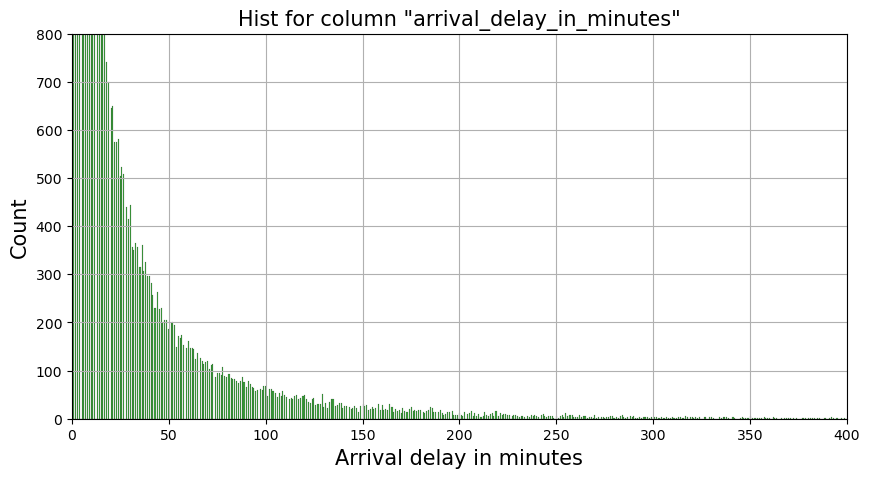

In [21]:
plt.figure(figsize=(10, 5))
plt.ylim(0, 800)
plt.xlim(0, 400)
plt.title('Hist for column "arrival_delay_in_minutes"', fontsize=15)
sns.histplot(data=train['arrival_delay_in_minutes'], color='g', kde=False)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Arrival delay in minutes', fontsize=15)
plt.grid(True)

**Arrival delay is continuous date and have asymmetric distribution**

In [22]:
print(f'Percentage of the number of passes from the total size train - {((train["arrival_delay_in_minutes"].isna().sum()/train.shape[0]) * 100):.2f}%')
print(f'\nPercentage of the number of passes from the total size test - {((test["arrival_delay_in_minutes"].isna().sum()/test.shape[0]) * 100):.2f}%')

Percentage of the number of passes from the total size train - 0.30%

Percentage of the number of passes from the total size test - 0.32%


**There is only 1 columns in both test and train data that has missing values. And the value is tiny: 83 rows in test and 310 in train. So in the fact that we can remove this missing values without any consequences for our future machine learning models, but let's think about how else we can deal with them. Since this is a column with a delayed arrival of the aircraft, it seems logical that the value in it should be approximately the same as the value in the column with a delayed departure or at least depends on it. Let's check it out**

In [23]:
print(stats.pearsonr(train.dropna()["departure_delay_in_minutes"], train.dropna()["arrival_delay_in_minutes"]), \
      stats.pearsonr(test.dropna()["departure_delay_in_minutes"], test.dropna()["arrival_delay_in_minutes"]))

(0.9654809013755734, 0.0) (0.964501771396213, 0.0)


**Pearson corr coef and p-value shows that there is strong positive linier relationship between delays.
Lets see it on some graphic.**

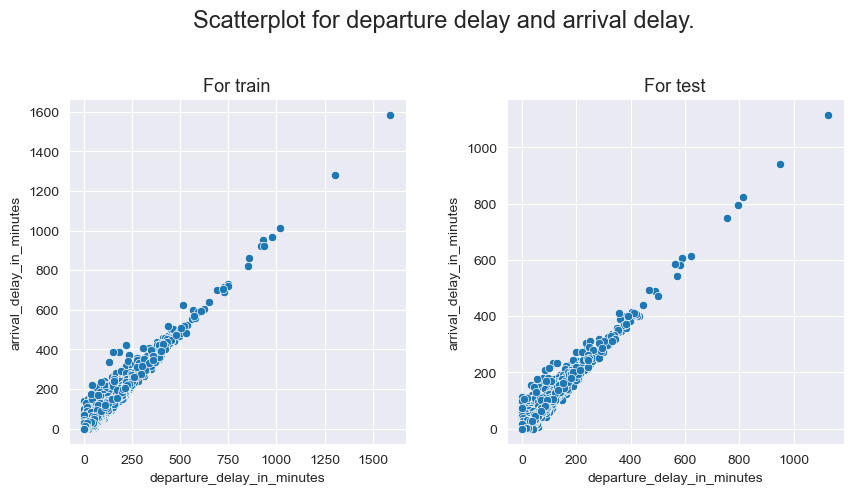

In [24]:
plt.figure(figsize=(10, 5))
sns.set_style('darkgrid')
plt.subplots_adjust(top=0.80, wspace=0.3, hspace=0.95)
plt.suptitle('Scatterplot for departure delay and arrival delay.', fontsize=17)
plt.subplot(1, 2, 1)
plt.title('For train', fontsize=13)
sns.scatterplot(x = train.dropna()["departure_delay_in_minutes"], 
                y = train.dropna()["arrival_delay_in_minutes"])
plt.subplot(1, 2, 2)
plt.title('For test', fontsize=13)
sns.scatterplot(x = test.dropna()["departure_delay_in_minutes"], 
                y = test.dropna()["arrival_delay_in_minutes"]);

**We can see that if dep delay increase the arrival does the same.
In the the fact of that i think we that we can fill our missing values in Arrival delay with the median value of Departure delay.**

In [25]:
# replace NaN with median as in task conditions
train['arrival_delay_in_minutes'] = train['arrival_delay_in_minutes'].fillna(train['departure_delay_in_minutes'].median())
test['arrival_delay_in_minutes'] = test['arrival_delay_in_minutes'].fillna(test['departure_delay_in_minutes'].median())

## Report

**Only the Arrival Delay in Minutes column has missing values. 310 observations in the `train` have missing values in this column. Since Arrival is strongly correlated with Departure Delay, We has imputed missing values in Arrival Delay with median of Departure Delay.**

# Part №1 Task №2. Univariate analysis.

**Lets select categorial and num features separately:**

In [26]:
print('Number of categorical variables: ', len([col for col in train.columns if train[col].dtypes == 'O']))
print('*'*80)
print('Categorical variables column name:',[col for col in train.columns if train[col].dtypes == 'O'])
print()
print('Number of numeric variables: ', len([col for col in train.columns if train[col].dtypes != 'O']))
print('*'*80)
print('Numeric variables column name:',[col for col in train.columns if train[col].dtypes != 'O'])

Number of categorical variables:  5
********************************************************************************
Categorical variables column name: ['gender', 'customer_type', 'type_of_travel', 'class', 'satisfaction']

Number of numeric variables:  18
********************************************************************************
Numeric variables column name: ['age', 'flight_distance', 'inflight_wifi_service', 'departure_arrival_time_convenient', 'ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'on_board_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             103904 non-null  object 
 1   customer_type                      103904 non-null  object 
 2   age                                103904 non-null  int64  
 3   type_of_travel                     103904 non-null  object 
 4   class                              103904 non-null  object 
 5   flight_distance                    103904 non-null  int64  
 6   inflight_wifi_service              103904 non-null  int64  
 7   departure_arrival_time_convenient  103904 non-null  int64  
 8   ease_of_online_booking             103904 non-null  int64  
 9   gate_location                      103904 non-null  int64  
 10  food_and_drink                     103904 non-null  int64  
 11  online_boarding                    1039

**In this dataset we have different types of attributes:**

 1. **Continuous**
 2. **Categorical**
 3. **Discrete**

In [28]:
train.describe(include='all')

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
count,103904,103904,103904.000000,103904,103904,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904
unique,2,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,female,loyal customer,NaN,business travel,business,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,52727,84923,NaN,71655,49665,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58879
mean,NaN,NaN,39.379706,NaN,NaN,1189.448375,2.729683,3.060296,2.756901,2.976883,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392,NaN
std,NaN,NaN,15.114964,NaN,NaN,997.147281,1.327829,1.525075,1.398929,1.277621,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776,NaN
min,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,NaN,NaN,40.000000,NaN,NaN,843.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,NaN,NaN,51.000000,NaN,NaN,1743.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


**The signs 'flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes', 'age' have the largest standard deviation, which indicates a large spread.**

## Look at continuous features: flight_distance, departure_delay_in_minutes, arrival_delay_in_minutes.

**`Flight_distance`**

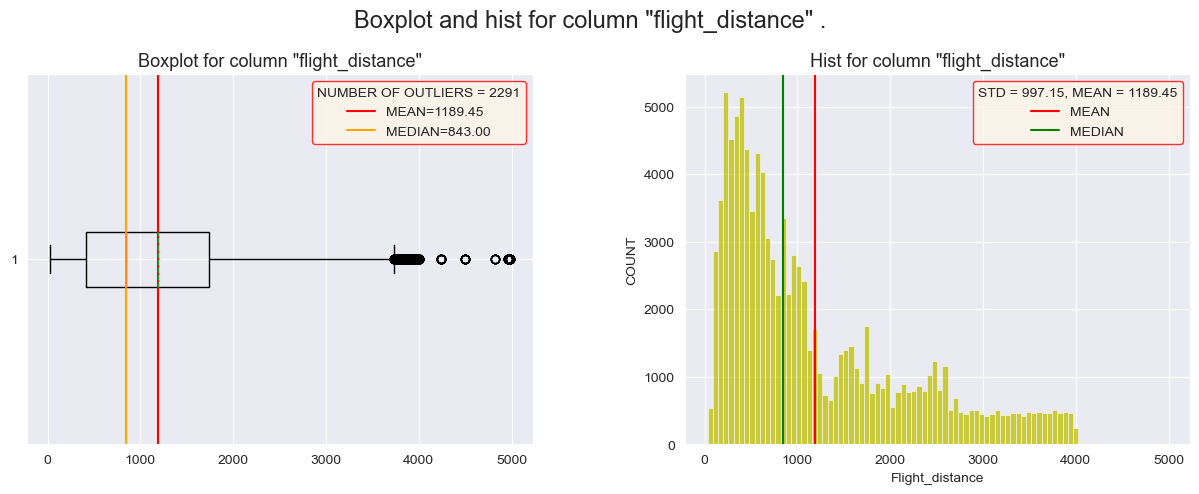

In [29]:
plt.figure(figsize=[15, 5])
plt.suptitle('Boxplot and hist for column "flight_distance" .', fontsize=17)
plt.subplot(1, 2, 1)
plt.subplots_adjust(top=0.85, wspace=0.3, hspace=0.95)
sns.set_style('darkgrid')
plt.title('Boxplot for column "flight_distance"', fontsize=13)
boxplot = plt.boxplot(train['flight_distance'].values, vert=False, meanline=True, showmeans=True)
outliers = list(boxplot['fliers'][0].get_data()[1])
mean = np.mean(train['flight_distance'])
plt.axvline(np.mean(train['flight_distance']), 
            color='r', 
            linestyle='-',
            label=f'MEAN={np.mean(train["flight_distance"]):.2f}')
median = np.median(train['flight_distance'])
plt.axvline(np.median(train['flight_distance']), 
            color='orange', 
            linestyle='-',
            label=f'MEDIAN={np.median(train["flight_distance"]):.2f}')
plt.legend(title=f"NUMBER OF OUTLIERS = {len(outliers)}",
           edgecolor = 'r',
           facecolor = 'oldlace')
plt.grid(True)
plt.subplot(1, 2, 2)
sns.set_style('darkgrid')
plt.title('Hist for column "flight_distance"', fontsize=13)
sns.histplot(data=train['flight_distance'], color='y', kde=False)
plt.ylabel('COUNT')
plt.xlabel('Flight_distance')
plt.axvline(np.mean(train['flight_distance']), 
            color='r', 
            linestyle='-',
            label='MEAN')
plt.axvline(np.median(train['flight_distance']), 
            color='green', 
            linestyle='-',
            label='MEDIAN')
std = train['flight_distance'].std()
plt.legend(title=f'STD = {std:.2f}, MEAN = {mean:.2f}', 
           edgecolor = 'r',
           facecolor = 'oldlace')
plt.show();

**The values have an asymmetric distribution, the median is less than the average. The data set has a positive skewness (as the average moves towards additional values)**

**shorter than 600–800 nmi (1,100–1,500 km), long-haul as being longer than 2,200–2,600 nmi (4,100–4,800 km), and medium-haul as being in-between. © Wikipedia**

**The attribute has a large range of values, we will adjust the scale**

In [30]:
# train['flight_distance'] = np.log(train['flight_distance'])
# test['flight_distance'] = np.log(test['flight_distance'])

In [31]:
train['flight_distance'] = np.log1p(train['flight_distance'])
test['flight_distance'] = np.log1p(test['flight_distance'])

**`Departure_delay_in_minutes`**

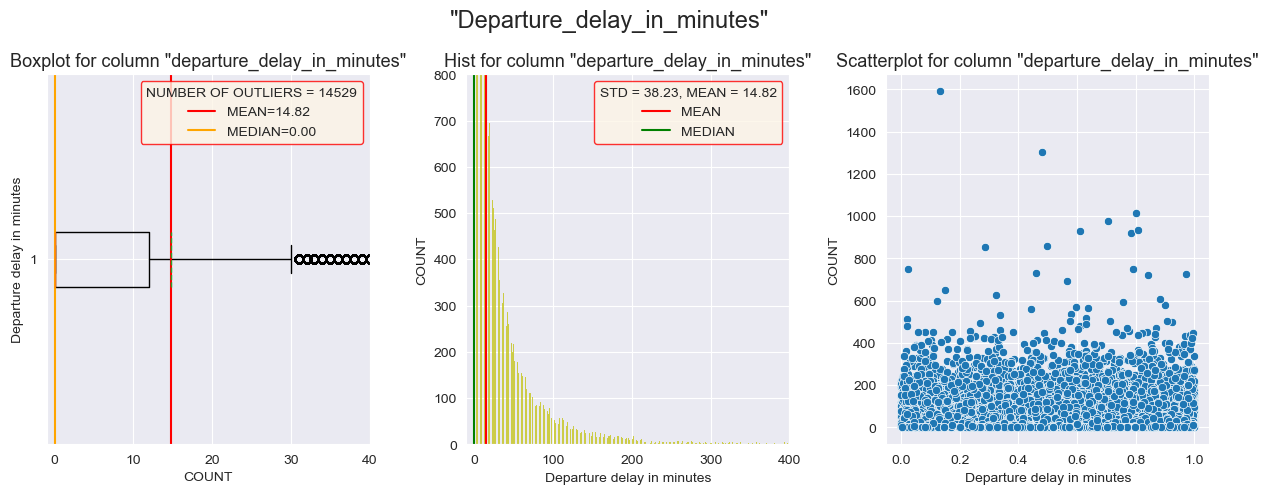

In [32]:
plt.figure(figsize=[15, 5])
plt.subplots_adjust(top=0.85, wspace=0.3, hspace=0.95)
plt.suptitle('"Departure_delay_in_minutes"', fontsize=17)
plt.subplot(1, 3, 1)
sns.set_style('darkgrid')
plt.xlim(-1, 40)
plt.title('Boxplot for column "departure_delay_in_minutes"', fontsize=13)
boxplot = plt.boxplot(train['departure_delay_in_minutes'].values, vert=False, meanline=True, showmeans=True)
outliers = list(boxplot['fliers'][0].get_data()[1])
mean = np.mean(train['departure_delay_in_minutes'])
plt.axvline(np.mean(train['departure_delay_in_minutes']), 
            color='r', 
            linestyle='-',
            label=f'MEAN={np.mean(train["departure_delay_in_minutes"]):.2f}')
median = np.median(train['departure_delay_in_minutes'])
plt.axvline(np.median(train['departure_delay_in_minutes']), 
            color='orange', 
            linestyle='-',
            label=f'MEDIAN={np.median(train["departure_delay_in_minutes"]):.2f}')
plt.xlabel('COUNT')
plt.ylabel('Departure delay in minutes')
plt.legend(title=f"NUMBER OF OUTLIERS = {len(outliers)}",
           edgecolor = 'r',
           facecolor = 'oldlace')
plt.grid(True)
plt.subplot(1, 3, 2)
sns.set_style('darkgrid')
plt.title('Hist for column "departure_delay_in_minutes"', fontsize=13)
plt.ylim(0, 800)
plt.xlim(-10, 400)
sns.histplot(data=train['departure_delay_in_minutes'], color='y', kde=False)
plt.ylabel('COUNT')
plt.xlabel('Departure delay in minutes')
plt.axvline(np.mean(train['departure_delay_in_minutes']), 
            color='r', 
            linestyle='-',
            label='MEAN')
plt.axvline(np.median(train['departure_delay_in_minutes']), 
            color='green', 
            linestyle='-',
            label='MEDIAN')
std = train['departure_delay_in_minutes'].std()
plt.legend(title=f'STD = {std:.2f}, MEAN = {mean:.2f}', 
           edgecolor = 'r',
           facecolor = 'oldlace')
plt.subplot(1, 3, 3)
sns.set_style('darkgrid')
plt.title('Scatterplot for column "departure_delay_in_minutes"', fontsize=13)
sns.scatterplot(np.random.rand(train.shape[0]), train['departure_delay_in_minutes'])
plt.ylabel('COUNT')
plt.xlabel('Departure delay in minutes')
plt.show();

**The values have an asymmetric distribution, the median is less than the average. The data set has a positive skewness (as the average moves towards additional values)**

**There are anomalies in the values of the attribute, let's get rid of them**

In [33]:
def change_delays(df, feature_name, new_feature):
    mean = df[feature_name].mean()
    mask = df[feature_name] <= mean
    df.loc[mask, new_feature] = 0
    mask = df[feature_name] > mean
    df.loc[mask, new_feature] = 1
    df[new_feature] = df[new_feature].astype(np.int8)
    return df

In [34]:
train = change_delays(train, 'departure_delay_in_minutes', 'delay_on_departure')
test = change_delays(test, 'departure_delay_in_minutes', 'delay_on_departure')

In [35]:
train.head(3)

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,delay_on_departure
0,male,loyal customer,13,personal travel,eco plus,6.133398,3,4,3,1,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,1
1,male,disloyal customer,25,business travel,business,5.463832,3,2,3,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0
2,female,loyal customer,26,business travel,business,7.041412,2,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,0


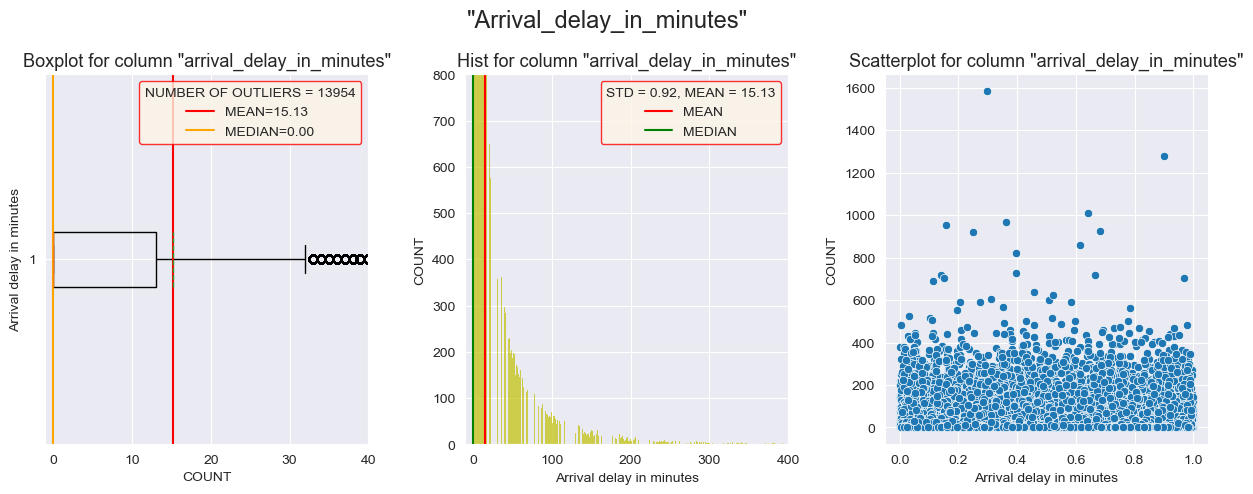

In [36]:
plt.figure(figsize=[15, 5])
plt.subplots_adjust(top=0.85, wspace=0.3, hspace=0.95)
plt.suptitle('"Arrival_delay_in_minutes"', fontsize=17)
plt.subplot(1, 3, 1)
sns.set_style('darkgrid')
plt.xlim(-1, 40)
plt.title('Boxplot for column "arrival_delay_in_minutes"', fontsize=13)
boxplot = plt.boxplot(train['arrival_delay_in_minutes'].values, vert=False, meanline=True, showmeans=True)
outliers = list(boxplot['fliers'][0].get_data()[1])
mean = np.mean(train['arrival_delay_in_minutes'])
plt.axvline(np.mean(train['arrival_delay_in_minutes']), 
            color='r', 
            linestyle='-',
            label=f'MEAN={mean:.2f}')
median = np.median(train['arrival_delay_in_minutes'])
plt.axvline(np.median(train['arrival_delay_in_minutes']), 
            color='orange', 
            linestyle='-',
            label=f'MEDIAN={median:.2f}')
plt.legend(title=f"NUMBER OF OUTLIERS = {len(outliers)}",
           edgecolor = 'r',
           facecolor = 'oldlace')
plt.xlabel('COUNT')
plt.ylabel('Arrival delay in minutes')
plt.grid(True)
plt.subplot(1, 3, 2)
sns.set_style('darkgrid')
plt.title('Hist for column "arrival_delay_in_minutes"', fontsize=13)
plt.ylim(0, 800)
plt.xlim(-10, 400)
sns.histplot(data=train['arrival_delay_in_minutes'], color='y', kde=False)
plt.ylabel('COUNT')
plt.xlabel('Arrival delay in minutes')
plt.axvline(np.mean(train['arrival_delay_in_minutes']), 
            color='r', 
            linestyle='-',
            label='MEAN')
plt.axvline(np.median(train['arrival_delay_in_minutes']), 
            color='green', 
            linestyle='-',
            label='MEDIAN')
std = train['flight_distance'].std()
plt.legend(title=f'STD = {std:.2f}, MEAN = {mean:.2f}', 
           edgecolor = 'r',
           facecolor = 'oldlace')
plt.subplot(1, 3, 3)
sns.set_style('darkgrid')
plt.title('Scatterplot for column "arrival_delay_in_minutes"', fontsize=13)
sns.scatterplot(np.random.rand(train.shape[0]), train['arrival_delay_in_minutes'])
plt.ylabel('COUNT')
plt.xlabel('Arrival delay in minutes')
plt.show();

**The values have an asymmetric distribution, the median is less than the average. The data set has a positive skewness (as the average moves towards additional values)**

**There are anomalies in the values of the attribute, let's get rid of them**

In [37]:
test = change_delays(test, 'arrival_delay_in_minutes', 'delay_on_arrival')
train = change_delays(train, 'arrival_delay_in_minutes', 'delay_on_arrival')

In [38]:
train.head(3)

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,delay_on_departure,delay_on_arrival
0,male,loyal customer,13,personal travel,eco plus,6.133398,3,4,3,1,...,3,4,4,5,5,25,18.0,neutral or dissatisfied,1,1
1,male,disloyal customer,25,business travel,business,5.463832,3,2,3,3,...,5,3,1,4,1,1,6.0,neutral or dissatisfied,0,0
2,female,loyal customer,26,business travel,business,7.041412,2,2,2,2,...,3,4,4,4,5,0,0.0,satisfied,0,0


In [39]:
def to_categorical(df):
    for column in df.select_dtypes(include='object').columns:
        df[column] = df[column].astype('category')
#         df[column + '_cat'] = df[column].cat.codes
    return df

In [40]:
train = to_categorical(train)
test = to_categorical(test)

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   gender                             103904 non-null  category
 1   customer_type                      103904 non-null  category
 2   age                                103904 non-null  int64   
 3   type_of_travel                     103904 non-null  category
 4   class                              103904 non-null  category
 5   flight_distance                    103904 non-null  float64 
 6   inflight_wifi_service              103904 non-null  int64   
 7   departure_arrival_time_convenient  103904 non-null  int64   
 8   ease_of_online_booking             103904 non-null  int64   
 9   gate_location                      103904 non-null  int64   
 10  food_and_drink                     103904 non-null  int64   
 11  online_boarding           

In [42]:
del change_delays, to_categorical

## Loook at discrete features: age

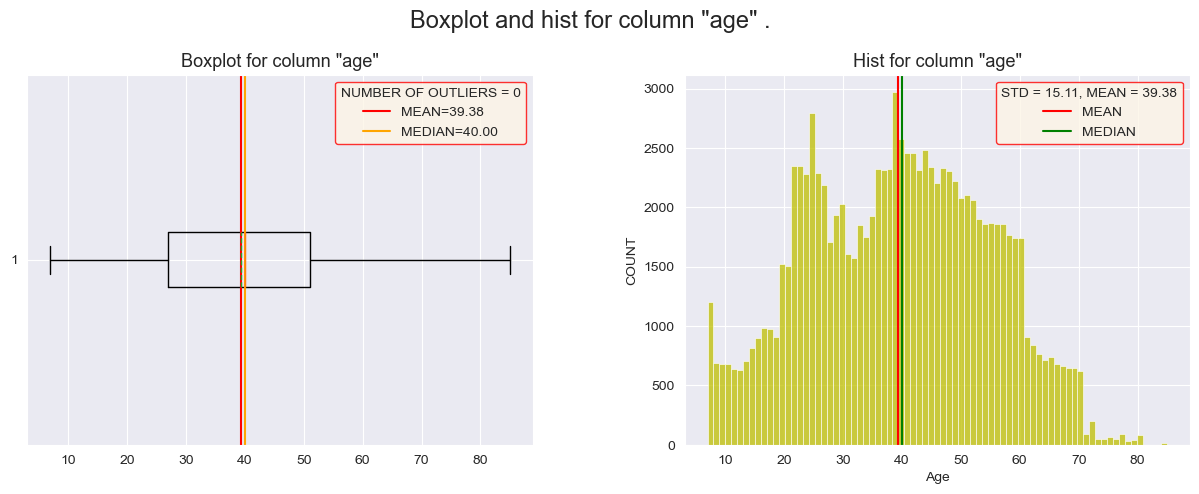

In [43]:
plt.figure(figsize=[15, 5])
plt.subplots_adjust(top=0.85, wspace=0.3, hspace=0.95)
plt.suptitle('Boxplot and hist for column "age" .', fontsize=17)
plt.subplot(1, 2, 1)
sns.set_style('darkgrid')
plt.title('Boxplot for column "age"', fontsize=13)
boxplot = plt.boxplot(train['age'].values, vert=False, meanline=True, showmeans=True)
outliers = list(boxplot['fliers'][0].get_data()[1])
mean = np.mean(train['age'])
plt.axvline(np.mean(train['age']), 
            color='r', 
            linestyle='-',
            label=f'MEAN={mean:.2f}')
median = np.median(train['age'])
plt.axvline(np.median(train['age']), 
            color='orange', 
            linestyle='-',
            label=f'MEDIAN={median:.2f}')
plt.legend(title=f"NUMBER OF OUTLIERS = {len(outliers)}",
           edgecolor = 'r',
           facecolor = 'oldlace')
plt.grid(True)
plt.subplot(1, 2, 2)
sns.set_style('darkgrid')
plt.title('Hist for column "age"', fontsize=13)
sns.histplot(data=train['age'], color='y', kde=False)
plt.ylabel('COUNT')
plt.xlabel('Age')
plt.axvline(np.mean(train['age']), 
            color='r', 
            linestyle='-',
            label='MEAN')
plt.axvline(np.median(train['age']), 
            color='green', 
            linestyle='-',
            label='MEDIAN')
std = train['age'].std()
plt.legend(title=f'STD = {std:.2f}, MEAN = {mean:.2f}', 
           edgecolor = 'r',
           facecolor = 'oldlace')
plt.show();

**The median is less than the average, which means the set has a negative skewness. The data has a distribution close to normal. There are no abnormal values**

## Look at categorical: the others

In [44]:
for column in train.columns.tolist():
    if train[column].dtype == 'category':
        print(f'\nUnique value of column "{column}":', train[column].unique())


Unique value of column "gender": ['male', 'female']
Categories (2, object): ['female', 'male']

Unique value of column "customer_type": ['loyal customer', 'disloyal customer']
Categories (2, object): ['disloyal customer', 'loyal customer']

Unique value of column "type_of_travel": ['personal travel', 'business travel']
Categories (2, object): ['business travel', 'personal travel']

Unique value of column "class": ['eco plus', 'business', 'eco']
Categories (3, object): ['business', 'eco', 'eco plus']

Unique value of column "satisfaction": ['neutral or dissatisfied', 'satisfied']
Categories (2, object): ['neutral or dissatisfied', 'satisfied']


**There are no abnormal values**

In [45]:
lst_with_numeric_categorical_columns = ['inflight_wifi_service', 'departure_arrival_time_convenient', 'ease_of_online_booking',
                                        'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
                                        'inflight_entertainment', 'on_board_service', 'leg_room_service',
                                        'baggage_handling', 'checkin_service', 'inflight_service','cleanliness',
                                        'delay_on_departure', 'delay_on_arrival']

In [46]:
for column in lst_with_numeric_categorical_columns:
    print(f'\nUnique value of column "{column}":', sorted(train[column].unique()))


Unique value of column "inflight_wifi_service": [0, 1, 2, 3, 4, 5]

Unique value of column "departure_arrival_time_convenient": [0, 1, 2, 3, 4, 5]

Unique value of column "ease_of_online_booking": [0, 1, 2, 3, 4, 5]

Unique value of column "gate_location": [0, 1, 2, 3, 4, 5]

Unique value of column "food_and_drink": [0, 1, 2, 3, 4, 5]

Unique value of column "online_boarding": [0, 1, 2, 3, 4, 5]

Unique value of column "seat_comfort": [0, 1, 2, 3, 4, 5]

Unique value of column "inflight_entertainment": [0, 1, 2, 3, 4, 5]

Unique value of column "on_board_service": [0, 1, 2, 3, 4, 5]

Unique value of column "leg_room_service": [0, 1, 2, 3, 4, 5]

Unique value of column "baggage_handling": [1, 2, 3, 4, 5]

Unique value of column "checkin_service": [0, 1, 2, 3, 4, 5]

Unique value of column "inflight_service": [0, 1, 2, 3, 4, 5]

Unique value of column "cleanliness": [0, 1, 2, 3, 4, 5]

Unique value of column "delay_on_departure": [0, 1]

Unique value of column "delay_on_arrival": [0, 1]

**There are no abnormal values**

In [47]:
del lst_with_numeric_categorical_columns

## Conclusion

 - **The signs have a large spread, and in the future, depending on the model, scaling may be required.**
 
 
- **Got rid of outliers**

# Part №1 Task №3. Multivariate analysis

## Let's compare the departure delay time and the arrival delay time

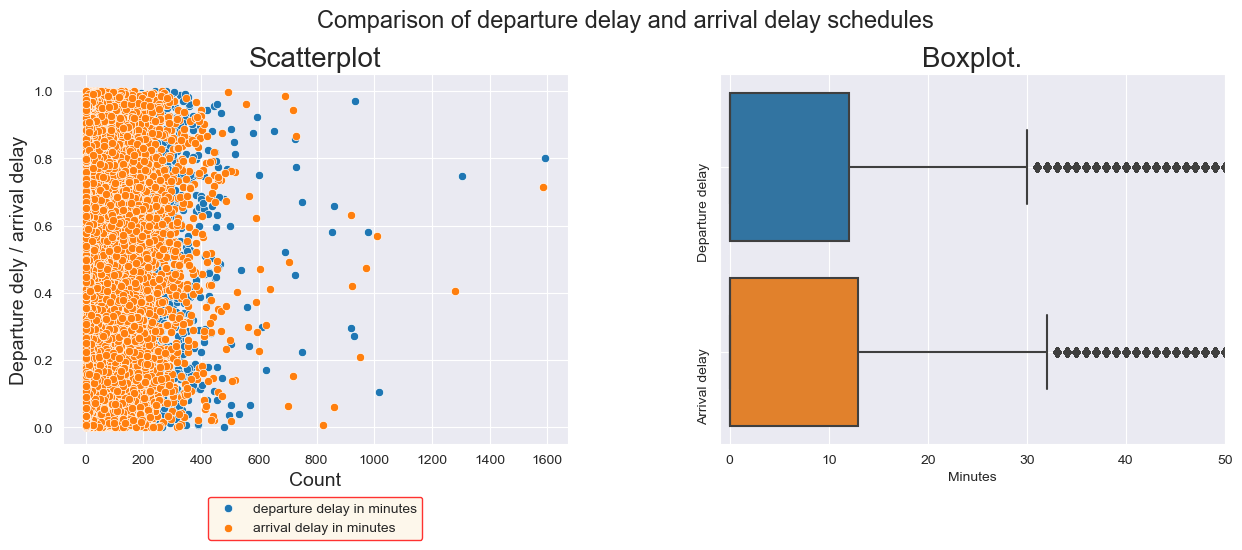

In [48]:
plt.figure(figsize=[15, 5])
plt.subplots_adjust(top=0.85, wspace=0.3, hspace=0.95)
plt.suptitle('Comparison of departure delay and arrival delay schedules', fontsize=17)
plt.subplot(1, 2, 1)
plt.title('Scatterplot', fontsize=20)
plt.ylabel('Departure dely / arrival delay', fontsize=14)
plt.xlabel('Count', fontsize=14)
sns.scatterplot(train['departure_delay_in_minutes'], np.random.rand(train.shape[0]),
                label='departure delay in minutes')
sns.scatterplot(train['arrival_delay_in_minutes'], np.random.rand(train.shape[0]),
                label='arrival delay in minutes')
plt.legend(edgecolor = 'r',
           facecolor = 'oldlace',
           loc='center', 
           bbox_to_anchor=(0.5, -0.20)),
plt.subplot(1, 2, 2)
sns.set_style('darkgrid')
plt.xlim(-1, 50)
plt.title('Boxplot.', fontsize=20)
sns.boxplot(data=train[['departure_delay_in_minutes', 'arrival_delay_in_minutes']], orient='h')
plt.yticks(np.arange(2), ['Departure delay', 'Arrival delay'],rotation='vertical')
plt.xlabel('Minutes')
plt.grid(True);
plt.show();

**The flight departure delay time i salmost proportionally proportional to the flight arrival delay time.**

**Basically, the lost time due to flight delays is within 400 minutes**

## Gender

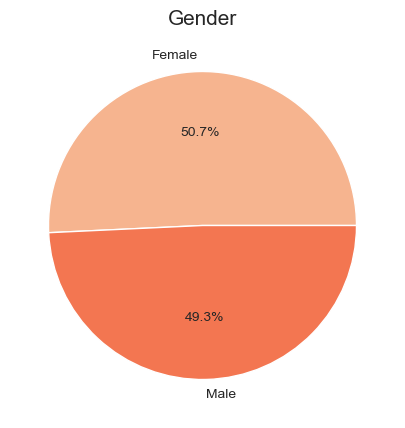

In [49]:
plt.figure(figsize=(7, 5))
plt.title('Gender', fontsize=15)
ax = plt.pie(train.gender.value_counts(), labels = ["Female", "Male"], 
        colors = sns.color_palette("rocket_r"), autopct = '%1.1f%%')
plt.show();

**Women fly a little more than men**

## Customer type

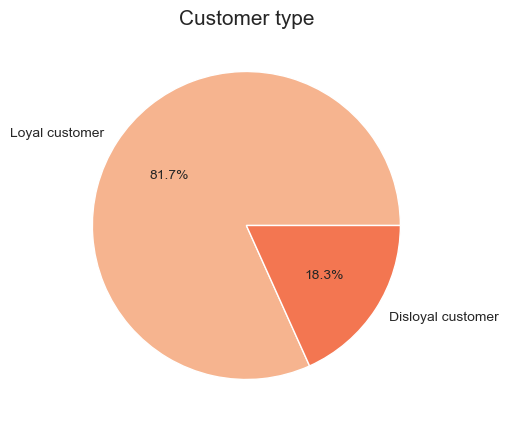

In [50]:
plt.figure(figsize=(7, 5))
plt.title('Customer type', fontsize=15)
ax = plt.pie(train.customer_type.value_counts(), labels = ["Loyal customer", "Disloyal customer"], 
        colors = sns.color_palette("rocket_r"), autopct = '%1.1f%%')
plt.show();

**Regular customers there are regular customers, there are more of them (82% of passangers are loyal)**

## Type of travel

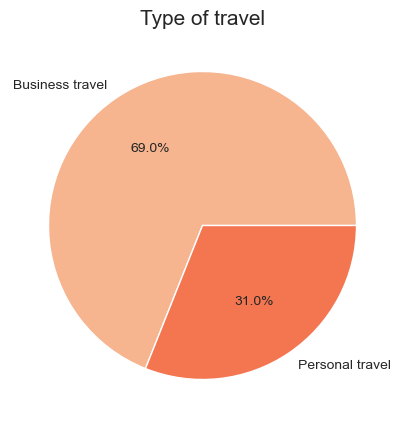

In [51]:
plt.figure(figsize=(7, 5))
plt.title('Type of travel', fontsize=15)
ax = plt.pie(train.type_of_travel.value_counts(), labels = ["Business travel", "Personal travel"], 
        colors = sns.color_palette("rocket_r"), autopct = '%1.1f%%')
plt.show();

**Work trips prevail over personal ones**

## Class

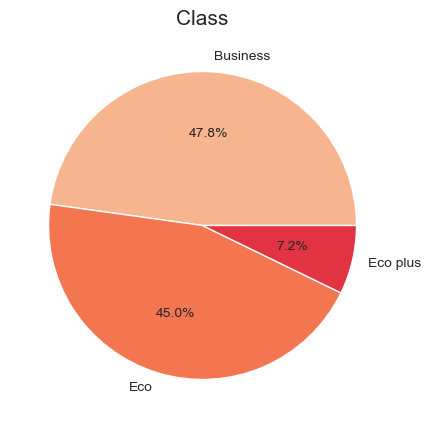

In [52]:
plt.figure(figsize=(7, 5))
plt.title('Class', fontsize=15)
ax = plt.pie(train['class'].value_counts(),  labels = ["Business ", "Eco", "Eco plus"],
        colors = sns.color_palette("rocket_r"), autopct = '%1.1f%%')
plt.show();

**Business class is more popular and eco plus less than all the others**

## Age

In [53]:
train['age_group'] = pd.cut(train['age'],bins= list(range(0,91,10)), labels=list(zip(range(1,91,10),range(10,101,10))))
test['age_group'] = pd.cut(test['age'],bins= list(range(0,91,10)), labels=list(zip(range(1,91,10),range(10,101,10))))

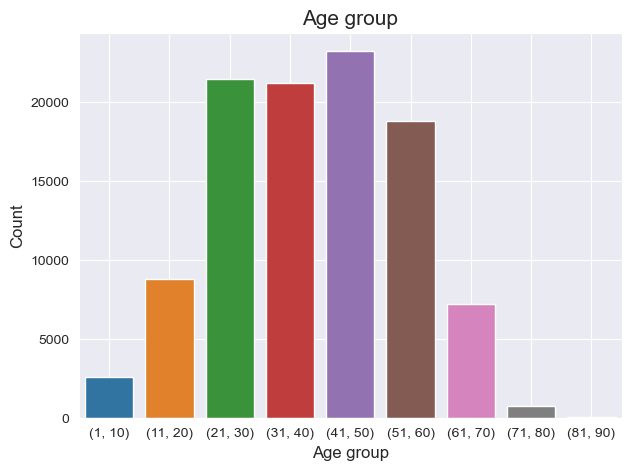

In [54]:
plt.figure(figsize=(7, 5))
plt.title('Age group', fontsize=15)
sns.set_style('darkgrid')
sns.barplot(data=train['age_group'].value_counts().reset_index(),
            x='index',
            y='age_group',
            label = "Age groups")
plt.grid(True)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Age group', fontsize=12);

**The largest part of passengers in the age range from 21 to 60 years. The largest number of passengers aged 41 and 50 years**

## Inflight entertainment and satisfaction

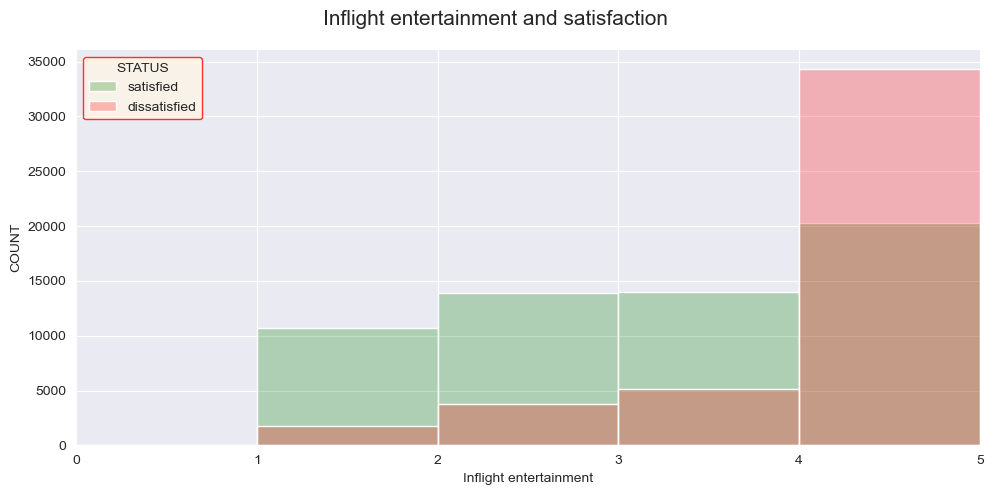

In [55]:
facet_grid = sns.FacetGrid(train, hue='satisfaction', height=5, aspect=2, palette=['green', 'red'])
facet_grid.map(sns.histplot, 'inflight_entertainment',
               alpha=0.25,
               element='bars',
               bins=[0,1,2,3,4,5])
facet_grid.set(xlim=(0, 5))
facet_grid.fig.suptitle('Inflight entertainment and satisfaction', fontsize=15)
facet_grid.set_axis_labels("Inflight entertainment", "COUNT")
facet_grid.fig.subplots_adjust(top=0.90)       
plt.legend(('satisfied', 'dissatisfied'),
    title='STATUS',
    edgecolor = 'r',
    facecolor = 'oldlace');

**For level 5, the number of dissatisfied is more than satisfied**

## Flight distance

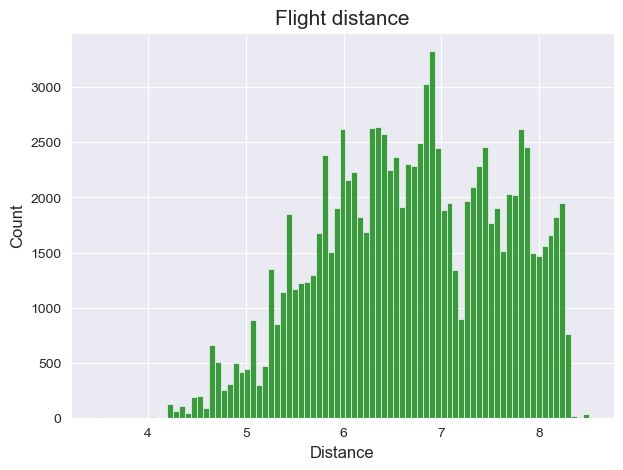

In [56]:
plt.figure(figsize=(7, 5))
plt.title('Flight distance', fontsize=15)
sns.set_style('darkgrid')
sns.histplot(data=train['flight_distance'], color='g', kde=False)
plt.grid(True)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Distance', fontsize=12);

**Flights up to 1000 miles are the most popular**

## Gate location

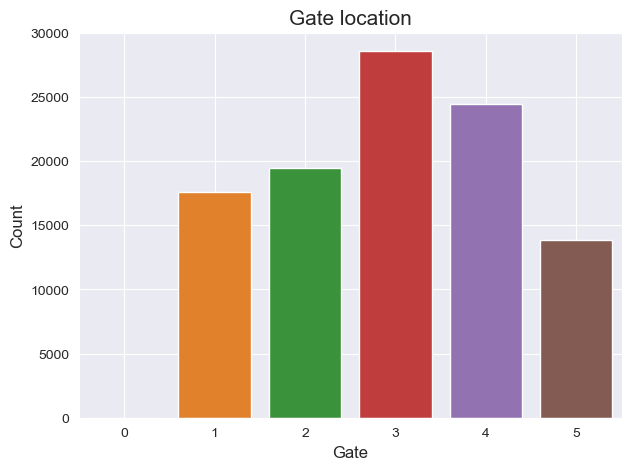

In [57]:
plt.figure(figsize=(7, 5))
plt.title('Gate location', fontsize=15)
sns.set_style('darkgrid')
sns.barplot(data=train['gate_location'].value_counts().reset_index(), 
             x='index',
             y='gate_location',
             label = 'Gate lovation')
plt.grid(True)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gate', fontsize=12);

**Exit №3 is used more often**

## Departure/arrival time convenient

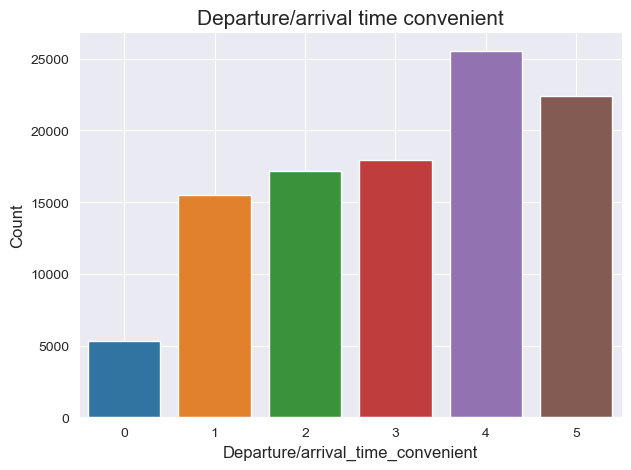

In [58]:
plt.figure(figsize=(7, 5))
plt.title('Departure/arrival time convenient', fontsize=15)
sns.set_style('darkgrid')
sns.barplot(data=train['departure_arrival_time_convenient'].value_counts().reset_index(),
            x='index',
            y='departure_arrival_time_convenient')
plt.grid(True)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Departure/arrival_time_convenient', fontsize=12);

**It looks like 4 and 5 is the most convenient time for passengers**

## Gender and satisfaction

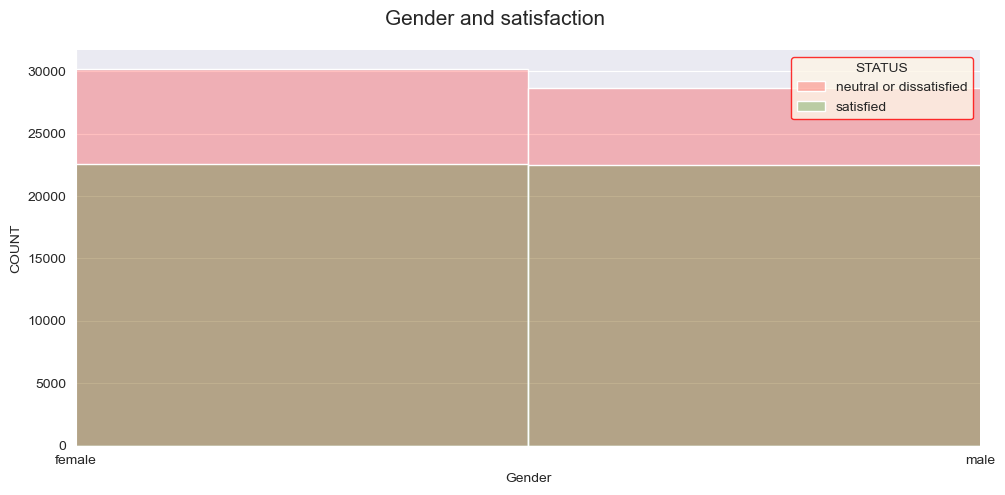

In [59]:
facet_grid = sns.FacetGrid(train, hue='satisfaction', height=5, aspect=2, palette=['red', 'green'])
facet_grid.map(sns.histplot, 'gender',
               alpha=0.25,
               element='bars',
               bins=[0,1])
facet_grid.set(xlim=(0, 1))
facet_grid.fig.suptitle('Gender and satisfaction', fontsize=15)
facet_grid.set_axis_labels("Gender", "COUNT")
facet_grid.fig.subplots_adjust(top=0.90)       
plt.legend(title='STATUS', 
           edgecolor = 'r',
           facecolor = 'oldlace')
plt.show();

**Regardless of gender, passengers are equally dissatisfied**

## Flight distance and satisfaction

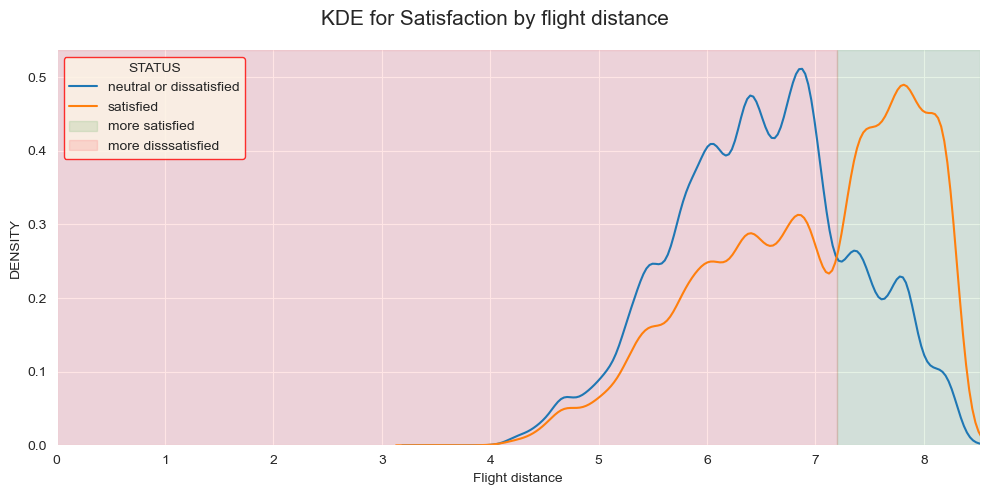

In [60]:
facet_grid = sns.FacetGrid(train, hue='satisfaction', height=5, aspect=2)
facet_grid.map(sns.kdeplot, 'flight_distance')
facet_grid.set(xlim=(0, train['flight_distance'].max()))
facet_grid.fig.suptitle('KDE for Satisfaction by flight distance', fontsize=15)
facet_grid.set_axis_labels("Flight distance", "DENSITY")
facet_grid.fig.subplots_adjust(top=0.90)


g = plt.axvspan(7.2, 
                train['flight_distance'].max(),
                color='green', 
                alpha=0.10, label='more satisfied')
r = plt.axvspan(0, 
                7.2,
                color='red',
                alpha=0.10, label='more disssatisfied')
plt.legend(title='STATUS',
           edgecolor = 'r',
           facecolor = 'oldlace')
plt.show();

**As the flight distance increases, the number of satisfied passengers also increases, perhaps this is due to the quality of service**

## Customer type and satisfaction

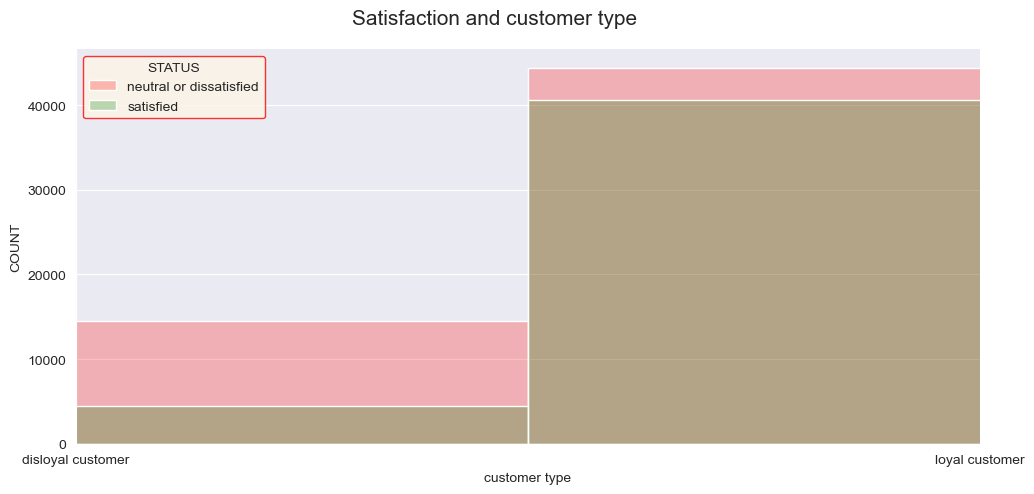

In [61]:
facet_grid = sns.FacetGrid(train, hue='satisfaction', height=5, aspect=2, palette=['red', 'green'])
facet_grid.map(sns.histplot, 'customer_type',
               alpha=0.25,
               element='bars',
               bins=[0,1])
facet_grid.set(xlim=(0, 1))
facet_grid.fig.suptitle('Satisfaction and customer type', fontsize=15)
facet_grid.set_axis_labels("customer type", "COUNT")
facet_grid.fig.subplots_adjust(top=0.90)       
plt.legend(title='STATUS', 
           edgecolor = 'r',
           facecolor = 'oldlace');

**Most of all customers are rather dissatisfied**

## Type of travel and satisfaction

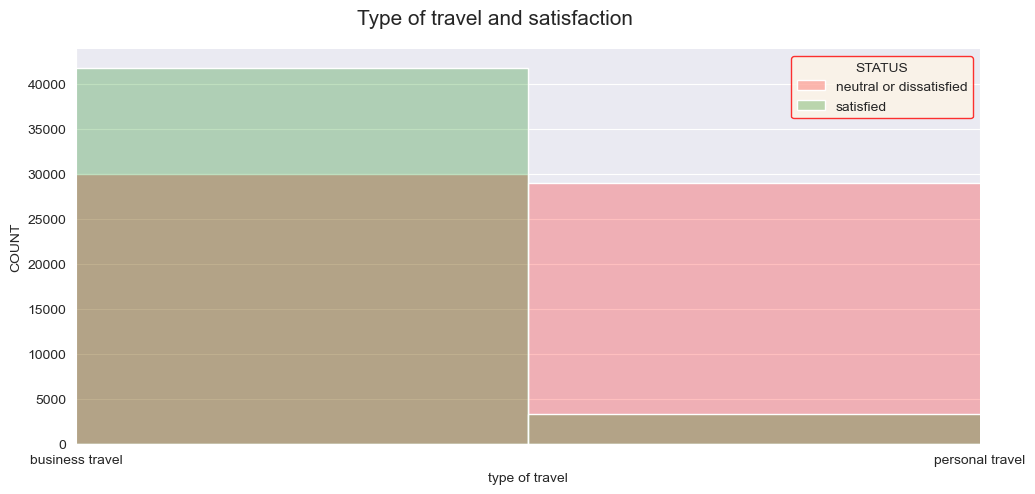

In [62]:
facet_grid = sns.FacetGrid(train, hue='satisfaction', height=5, aspect=2, palette=['red', 'green'])
facet_grid.map(sns.histplot, 'type_of_travel',
               alpha=0.25,
               element='bars',
               bins=[0,1])
facet_grid.set(xlim=(0, 1))
facet_grid.fig.suptitle('Type of travel and satisfaction', fontsize=15)
facet_grid.set_axis_labels("type of travel", "COUNT")
facet_grid.fig.subplots_adjust(top=0.90)       
plt.legend(title='STATUS',
           edgecolor = 'r',
           facecolor = 'oldlace');

**Working flights are now comfortable**

## Age and satisfaction

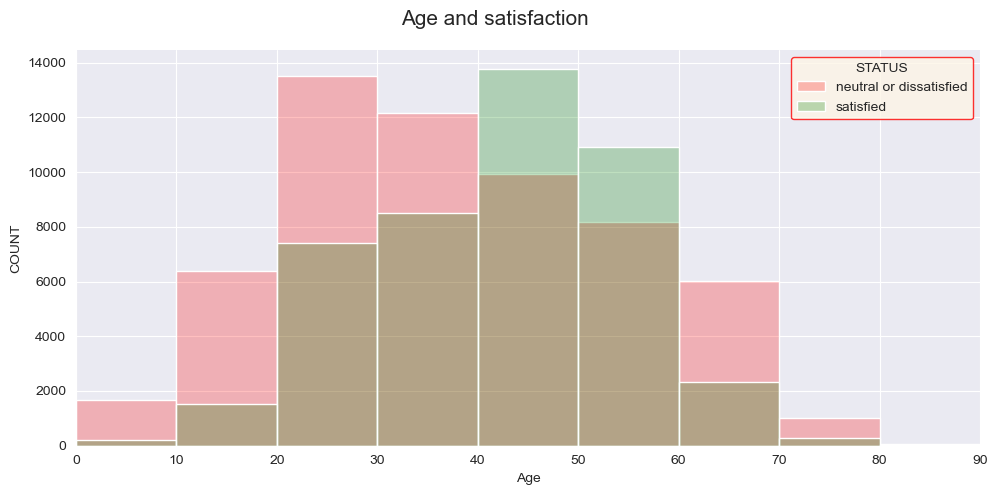

In [63]:
facet_grid = sns.FacetGrid(train, hue='satisfaction', height=5, aspect=2, palette=['red', 'green'])
facet_grid.map(sns.histplot, 'age',
               alpha=0.25,
               element='bars',
               bins=list(range(0,91,10)))
facet_grid.set(xlim=(0, 90))
facet_grid.fig.suptitle('Age and satisfaction', fontsize=15)
facet_grid.set_axis_labels("Age", "COUNT")
facet_grid.fig.subplots_adjust(top=0.90)       
plt.legend(title='STATUS',
           edgecolor = 'r',
           facecolor = 'oldlace');

**In the age group from 40 to 60 years , there are more satisfied than dissatisfied , in other groups there are more dissatisfied**

## Class and satisfaction

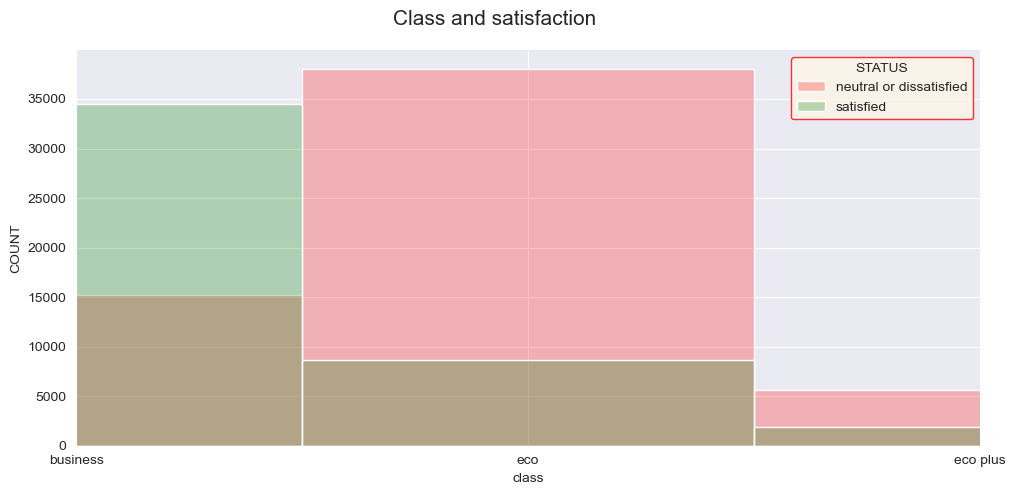

In [64]:
facet_grid = sns.FacetGrid(train, hue='satisfaction', height=5, aspect=2, palette=['red', 'green'])
facet_grid.map(sns.histplot, 'class',
               alpha=0.25,
               element='bars',
               bins=[0,1,2])
facet_grid.set(xlim=(0, 2))
facet_grid.fig.suptitle('Class and satisfaction', fontsize=15)
facet_grid.set_axis_labels("class", "COUNT")
facet_grid.fig.subplots_adjust(top=0.90)       
plt.legend(title='STATUS',
           edgecolor = 'r',
           facecolor = 'oldlace');

**Business class service is better than the rest, and in economy class on the contrary.**

## Class and flight distance

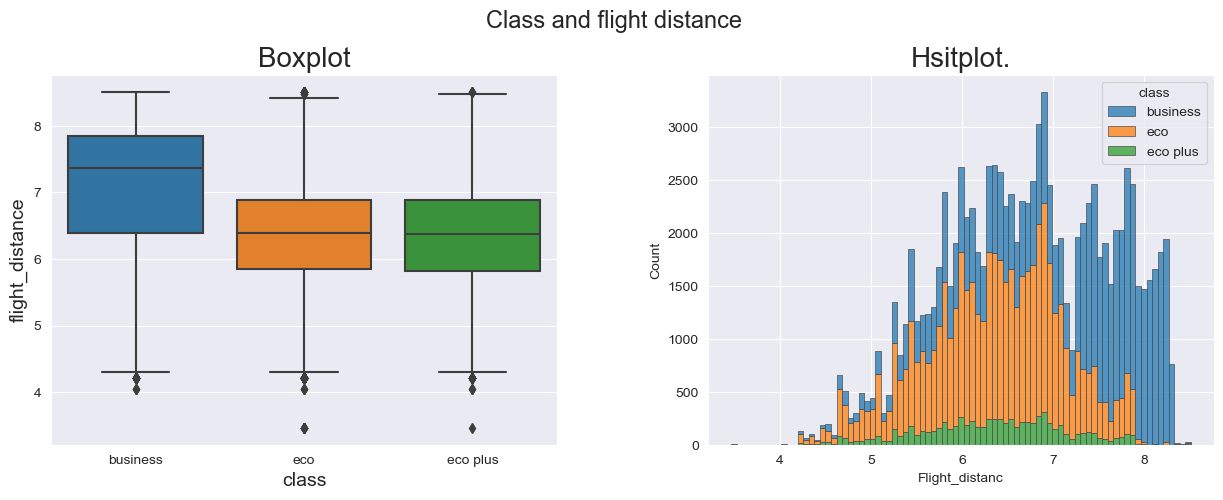

In [65]:
plt.figure(figsize=[15, 5])
plt.subplots_adjust(top=0.85, wspace=0.3, hspace=0.95)
plt.grid(True)
plt.suptitle('Class and flight distance', fontsize=17)
plt.subplot(1, 2, 1)
plt.title('Boxplot', fontsize=20)
plt.ylabel('Flight_distanc', fontsize=14)
plt.xlabel('Class', fontsize=14)
sns.boxplot(x = "class", y = "flight_distance", data = train)
plt.subplot(1, 2, 2)
sns.set_style('darkgrid')
plt.title('Hsitplot.', fontsize=20)
sns.histplot(train, x = "flight_distance", hue = "class",
             multiple = "stack", edgecolor = ".3", linewidth = .5, legend=True)
plt.xlabel('Flight_distanc')
plt.show();

**We can see that almost all customers whoes flight is longer than 2500 km buy tickets in buisness class**

## Age and class

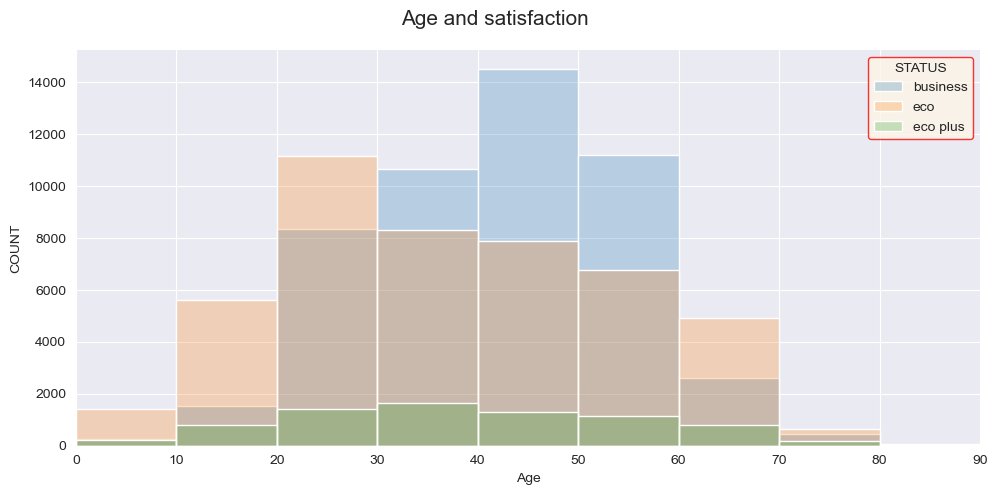

In [66]:
facet_grid = sns.FacetGrid(train, hue='class', height=5, aspect=2)
facet_grid.map(sns.histplot, 'age',
               alpha=0.25,
               element='bars',
               bins=list(range(0,91,10)))
facet_grid.set(xlim=(0, 90))
facet_grid.fig.suptitle('Age and satisfaction', fontsize=15)
facet_grid.set_axis_labels("Age", "COUNT")
facet_grid.fig.subplots_adjust(top=0.90)       
plt.legend(title='STATUS',
           edgecolor = 'r',
           facecolor = 'oldlace');

**Passengers from 30 to 60 years old fly mainly business class**

## Gate and satisfaction

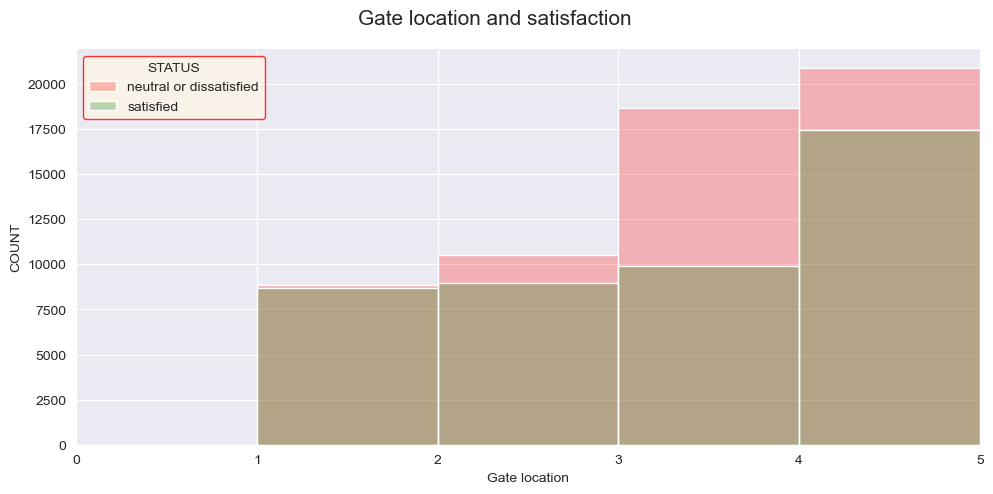

In [67]:
facet_grid = sns.FacetGrid(train, hue='satisfaction', height=5, aspect=2, palette=['red', 'green'])
facet_grid.map(sns.histplot, 'gate_location',
               alpha=0.25,
               element='bars',
               bins=[0,1,2,3,4,5])
facet_grid.set(xlim=(0, 5))
facet_grid.fig.suptitle('Gate location and satisfaction', fontsize=15)
facet_grid.set_axis_labels("Gate location", "COUNT")
facet_grid.fig.subplots_adjust(top=0.90)       
plt.legend(title='STATUS',
           edgecolor = 'r',
           facecolor = 'oldlace')
plt.show();

**Almost all exits are inconvenient for passengers, but there are more satisfied passengers for 5 exits**

## Satisfaction

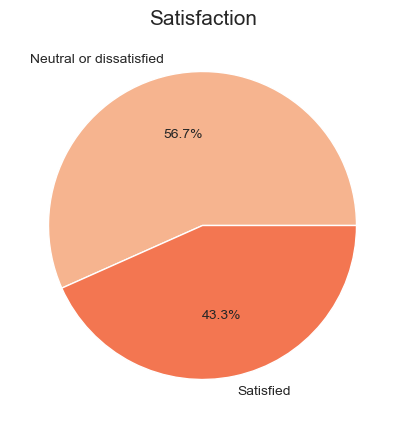

In [68]:
plt.figure(figsize=(7, 5))
plt.title('Satisfaction', fontsize=15)
ax = plt.pie(train.satisfaction.value_counts(), labels = ["Neutral or dissatisfied ", "Satisfied"], 
             colors = sns.color_palette("rocket_r"), autopct = '%1.1f%%')
plt.show();

**Passenger service strives for the best quality, but there are still more dissatisfied.**

**There is an imbalance of classes in target feature**

## Correlation matrix

**First of all, we will make a separate data set in which text-categorical features will be encoded. This is necessary for the convenience of research**

In [69]:
train_for_matrix = train.copy()
encoder = OrdinalEncoder()
train_for_matrix[['gender', 'customer_type', 'type_of_travel', 'class', 'satisfaction']] = encoder.fit_transform(train_for_matrix[['gender', 'customer_type', 'type_of_travel', 'class', 'satisfaction']])

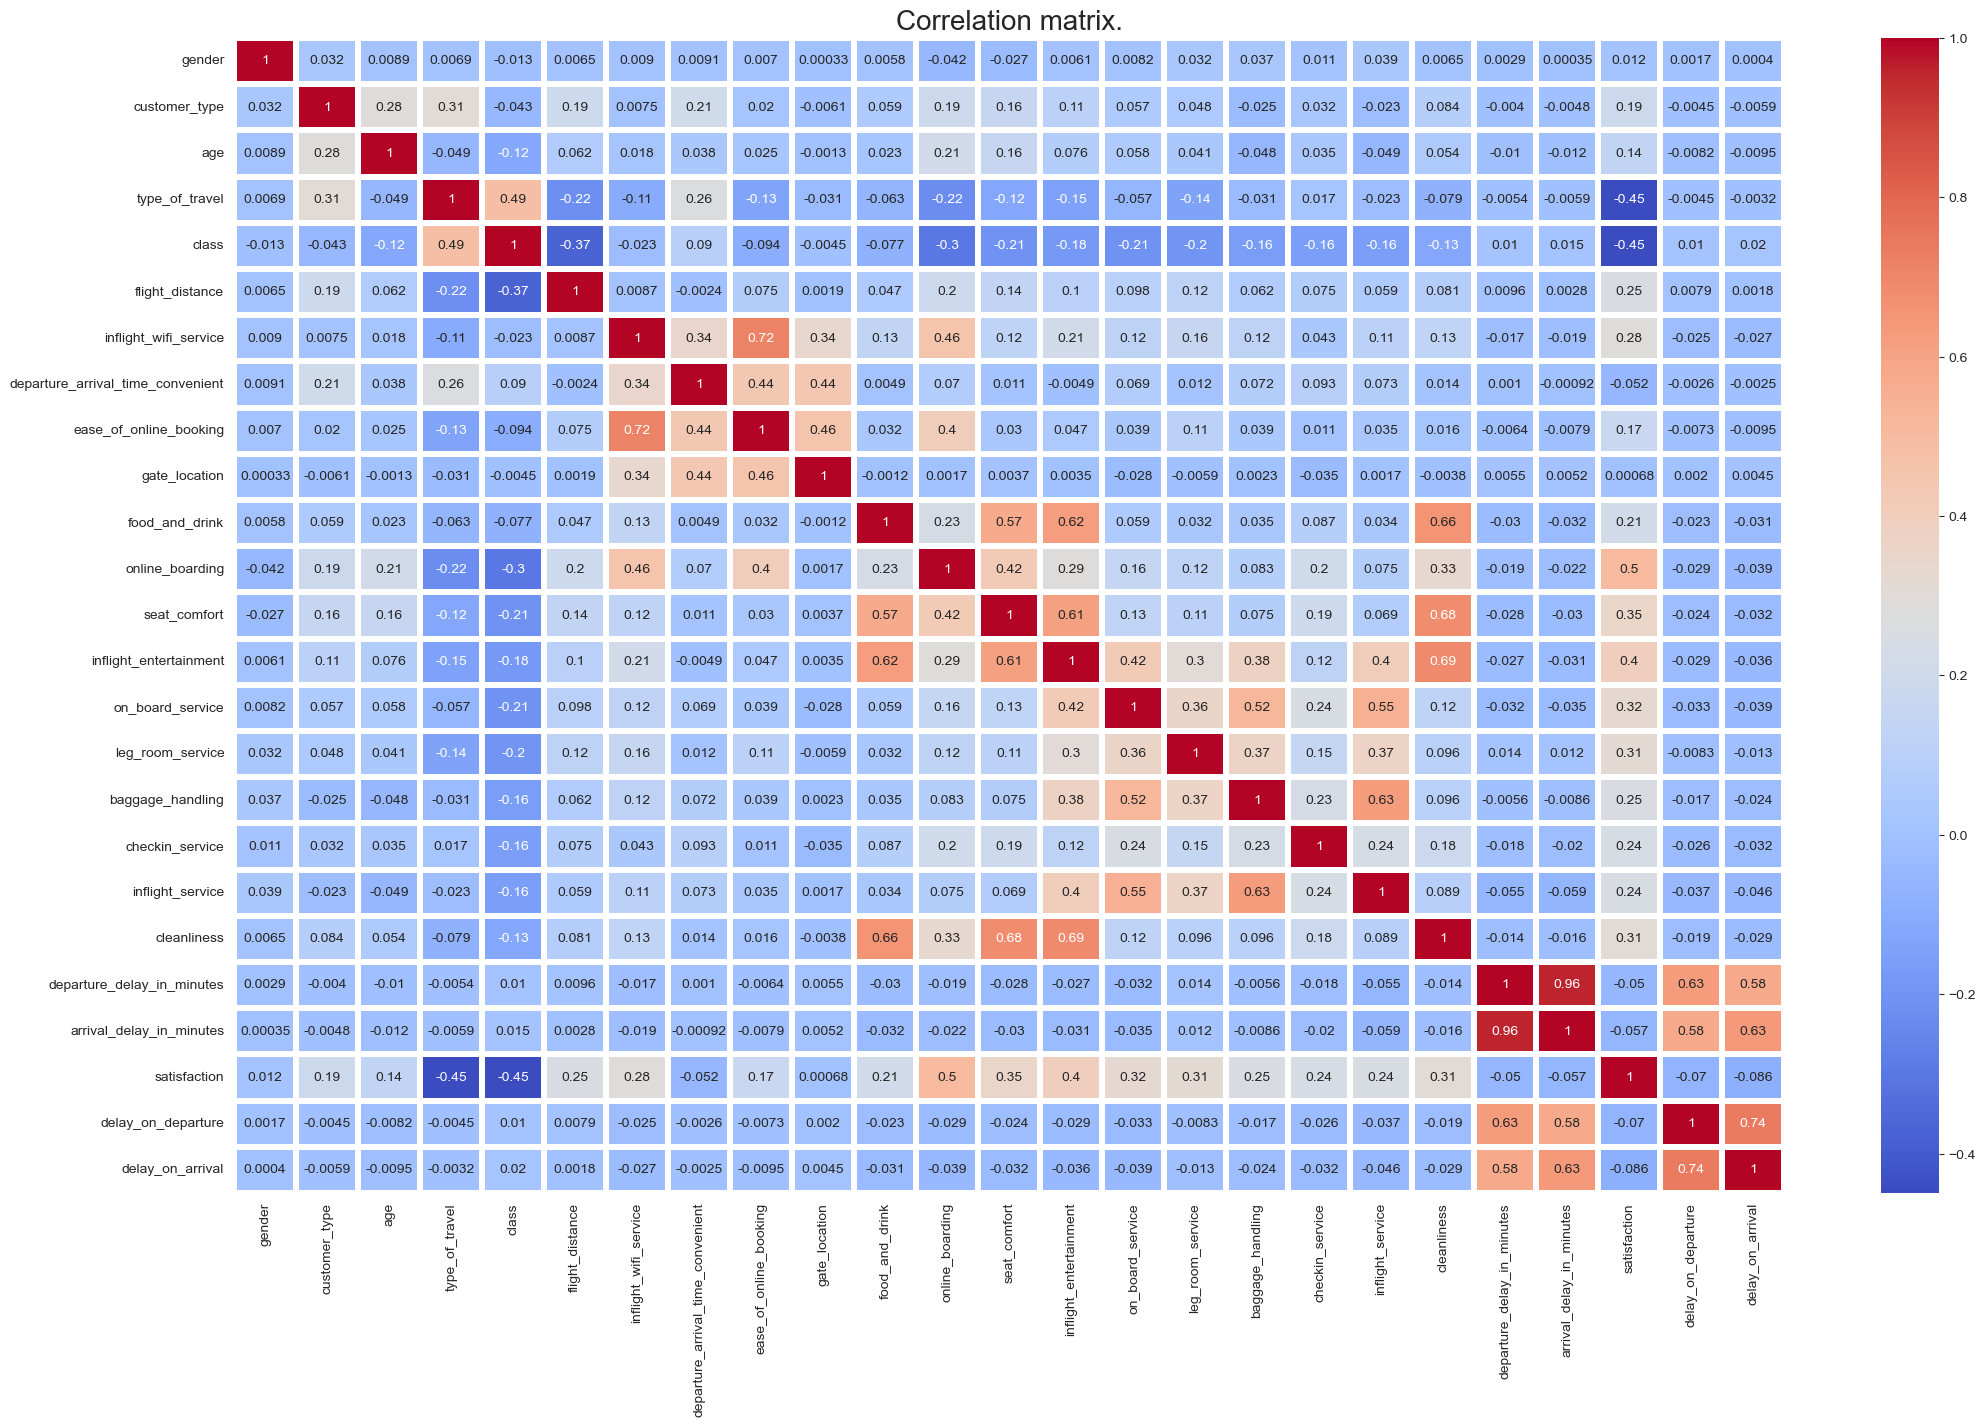

In [70]:
fig, ax = plt.subplots(figsize=(25,15))
plt.title('Correlation matrix.', fontsize=20)
sns.heatmap(train_for_matrix.corr(), annot=True, cmap="coolwarm",  fmt='.2g', linewidth=4)
plt.grid(True);

**It is worth noting that the quality of wi-fi affects the quality of the "easy of online booking" service, and the quality of the "food and drinks" service affects the evaluation of the "inflight_entertainment" service, "cleanliness" affects the evaluation of "seat_comfort, and "seat_comfort" in turn affects "inflight_entertainment". The most significant correlations are listed above.There is a multicollinearity between the signs of delayed departure and delayed arrival.**

## Conclusion

 - **Number of loyal customers is high, however, the dissatisfaction level is high irrespective of the loyalty.   Company will have     to work on maintaining the loyal customers**
 
 
 - **Gender doesn't play an important role in the satisfaction**
 
 
 - **With a long flight, the quality of services is better.**
 
 
 - **Business Travellers seems to be more satisfied with the flight, than the personal travellers**
 
 
 - **There are more work trips than personal ones, most work trips are made by business class.**
 

 - **In the age group from 40-60 years, there are more satisfied passengers than in the rest, apparently because they fly business class**
 
 
 - **People in business class seems to be the most satisfied, and those in economy class are least satisfied**

# Part №1 Task №4. Hypothesis

## Loyal customer and business travel

**Let's check the assumption that loyal customers fly more often on business travel.**

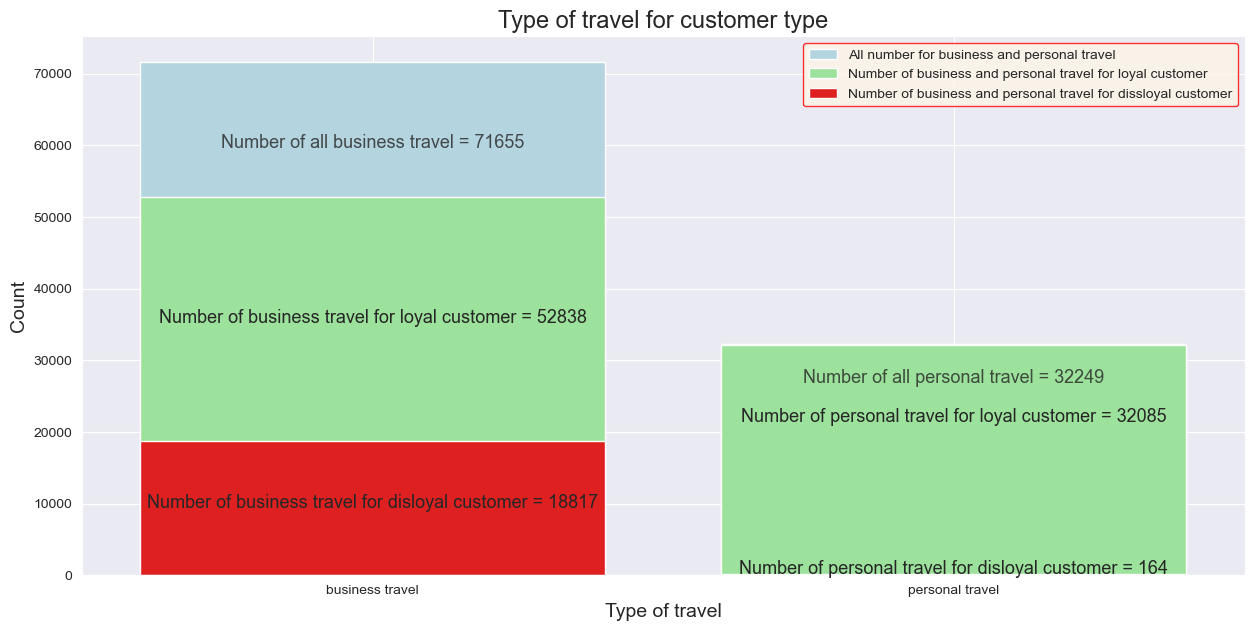

In [71]:
plt.figure(figsize=(15, 7))
plt.title('Type of travel for customer type', fontsize=17)
sns.set_style('darkgrid')
number_of_all_b_travel = train.query('type_of_travel == "business travel"')['satisfaction'].count()
number_of_all_p_travel = train.query('type_of_travel == "personal travel"')['satisfaction'].count()
plt.text((0),(number_of_all_b_travel - (number_of_all_b_travel/6)), 
         f'Number of all business travel = {number_of_all_b_travel}', 
         fontsize=13, 
         alpha=0.8, 
         ha='center')
plt.text((1),(number_of_all_p_travel - (number_of_all_p_travel/6)), 
         f'Number of all personal travel = {number_of_all_p_travel}', 
         fontsize=13, 
         alpha=0.8, 
         ha='center')
sns.barplot(data=train.groupby('type_of_travel')['satisfaction'].count().reset_index(),
            x='type_of_travel',
            y='satisfaction',
            color='lightblue', 
            label = "All number for business and personal travel")
number_of_b_travel_for_loyal_customer = train.query('(type_of_travel == "business travel") & (customer_type == "loyal customer")')['satisfaction'].count()
number_of_p_travel_for_loyal_customer = train.query('(type_of_travel == "personal travel") & (customer_type == "loyal customer")')['satisfaction'].count()
plt.text((0),(number_of_b_travel_for_loyal_customer - (number_of_b_travel_for_loyal_customer/3)), 
         f'Number of business travel for loyal customer = {number_of_b_travel_for_loyal_customer}', 
         fontsize=13, 
         alpha=1, 
         ha='center')
plt.text((1),(number_of_p_travel_for_loyal_customer - (number_of_p_travel_for_loyal_customer/3)), 
         f'Number of personal travel for loyal customer = {number_of_p_travel_for_loyal_customer}', 
         fontsize=13, 
         alpha=1, 
         ha='center')
sns.barplot(data=train.query('(customer_type == "loyal customer")')['type_of_travel'].value_counts().reset_index(),
            x='index',
            y='type_of_travel',
            color='lightgreen',
            label = "Number of business and personal travel for loyal customer")
number_of_b_travel_for_disloyal_customer = train.query('(type_of_travel == "business travel") & (customer_type == "disloyal customer")')['satisfaction'].count()
number_of_p_travel_for_disloyal_customer = train.query('(type_of_travel == "personal travel") & (customer_type == "disloyal customer")')['satisfaction'].count()
plt.text((0),(number_of_b_travel_for_disloyal_customer - (number_of_b_travel_for_disloyal_customer/2)), 
         f'Number of business travel for disloyal customer = {number_of_b_travel_for_disloyal_customer}', 
         fontsize=13, 
         alpha=1, 
         ha='center')
plt.text((1),(number_of_p_travel_for_disloyal_customer - (number_of_p_travel_for_disloyal_customer/50)), 
         f'Number of personal travel for disloyal customer = {number_of_p_travel_for_disloyal_customer}', 
         fontsize=13, 
         alpha=1, 
         ha='center')
sns.barplot(data=train.query('(customer_type == "disloyal customer")')['type_of_travel'].value_counts().reset_index(),
            x='index',
            y='type_of_travel',
            color='red', 
            label = "Number of business and personal travel for dissloyal customer")

plt.ylabel('Count', fontsize=14)
plt.xlabel('Type of travel', fontsize=14)
plt.grid(True)
plt.legend(edgecolor = 'r',
           facecolor = 'oldlace');

## Age and type of travel

**Let's test the hypothesis that children and pensioners (over 60) are more likely to make personal trips, and the rest are business trips**

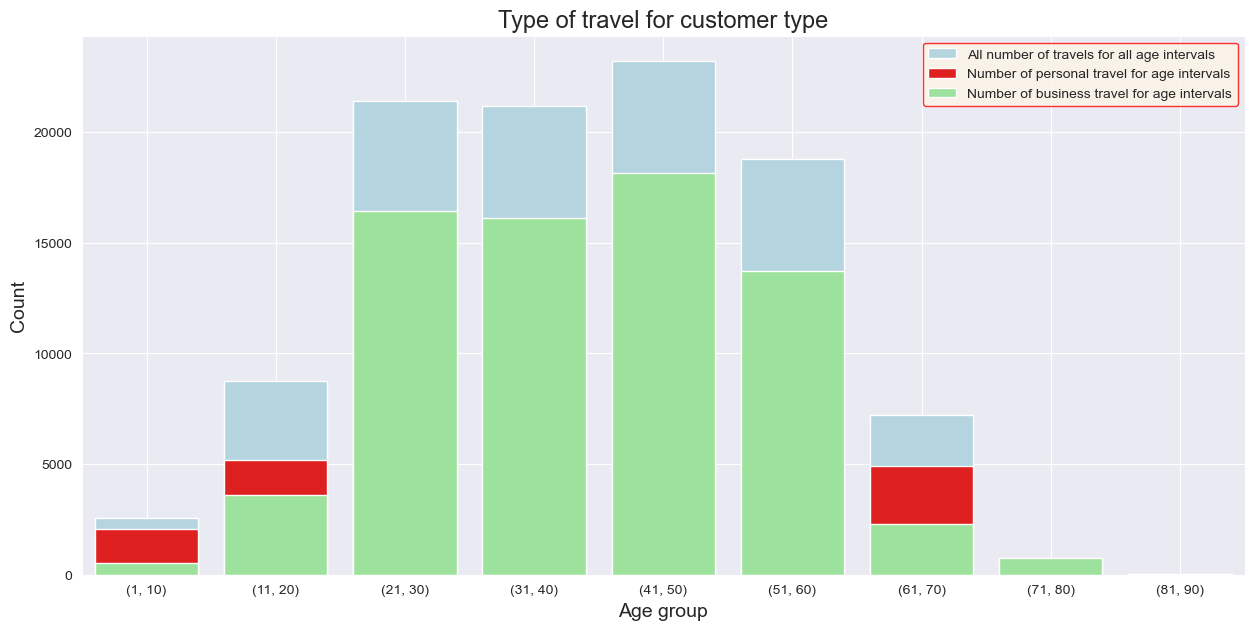

In [72]:
plt.figure(figsize=(15, 7))
plt.title('Type of travel and Age', fontsize=17)
sns.set_style('darkgrid')
sns.barplot(data=train.groupby('age_group')['satisfaction'].count().reset_index(),
            x='age_group',
            y='satisfaction',
            color='lightblue', 
            label = "All number of travels for all age intervals")
sns.barplot(data=train.query('type_of_travel == "personal travel"').groupby('age_group')['satisfaction'].count().reset_index(),
            x='age_group',
            y='satisfaction',
            color='red',
            label = "Number of personal travel for age intervals")
sns.barplot(data=train.query('type_of_travel == "business travel"').groupby('age_group')['satisfaction'].count().reset_index(),
            x='age_group',
            y='satisfaction',
            color='lightgreen', 
            label = "Number of business travel for age intervals")

plt.ylabel('Count', fontsize=14)
plt.xlabel('Age group', fontsize=14)
plt.grid(True)
plt.legend(edgecolor = 'r',
           facecolor = 'oldlace');

**Passengers in the range of 21-70 are more likely to make business trips. And the range from 0-20 and 71-80 is more personal.**

## Age and customer type

**Consider the hypothesis that as the age increases, the number of regular customers among passengers increases.**

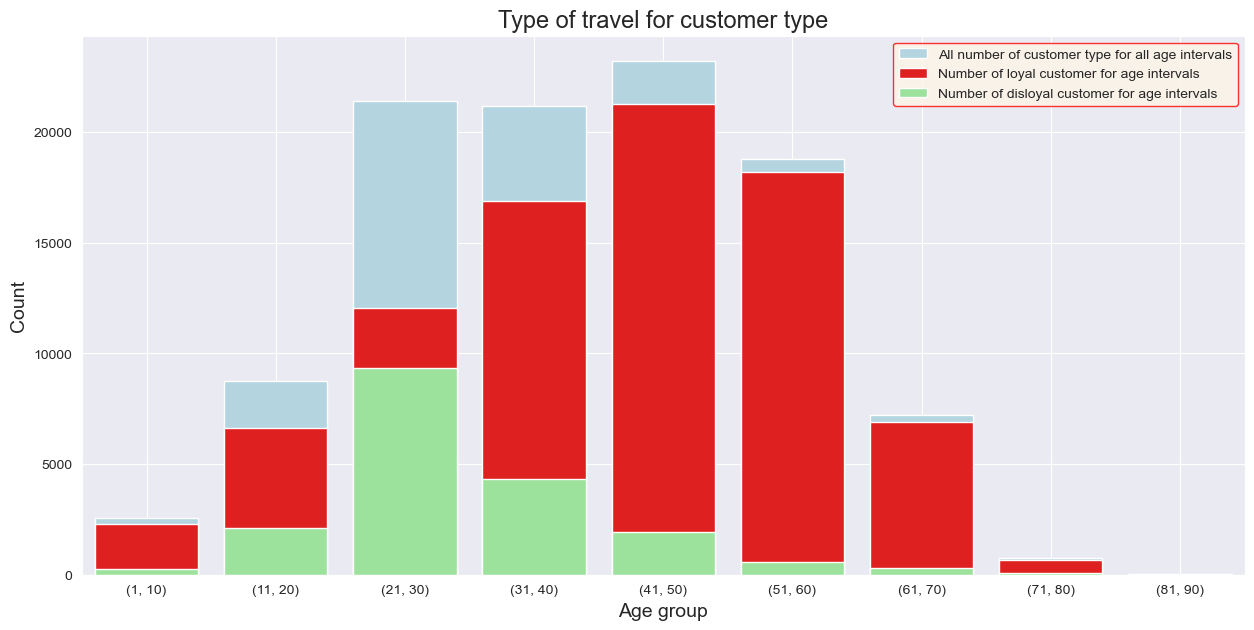

In [73]:
plt.figure(figsize=(15, 7))
plt.title('Age for customer type', fontsize=17)
sns.set_style('darkgrid')
sns.barplot(data=train.groupby('age_group')['satisfaction'].count().reset_index(),
            x='age_group',
            y='satisfaction',
            color='lightblue', 
            label = "All number of customer type for all age intervals")
sns.barplot(data=train.query('customer_type == "loyal customer"').groupby('age_group')['satisfaction'].count().reset_index(),
            x='age_group',
            y='satisfaction',
            color='red',
            label = "Number of loyal customer for age intervals")
sns.barplot(data=train.query('customer_type == "disloyal customer"').groupby('age_group')['satisfaction'].count().reset_index(),
            x='age_group',
            y='satisfaction',
            color='lightgreen', 
            label = "Number of disloyal customer for age intervals")

plt.ylabel('Count', fontsize=14)
plt.xlabel('Age group', fontsize=14)
plt.grid(True)
plt.legend(edgecolor = 'r',
           facecolor = 'oldlace');

**There are more regular customers**

## Gender and type of travel

**Let's test the hypothesis, regardless of gender, passengers make the same number of trips**

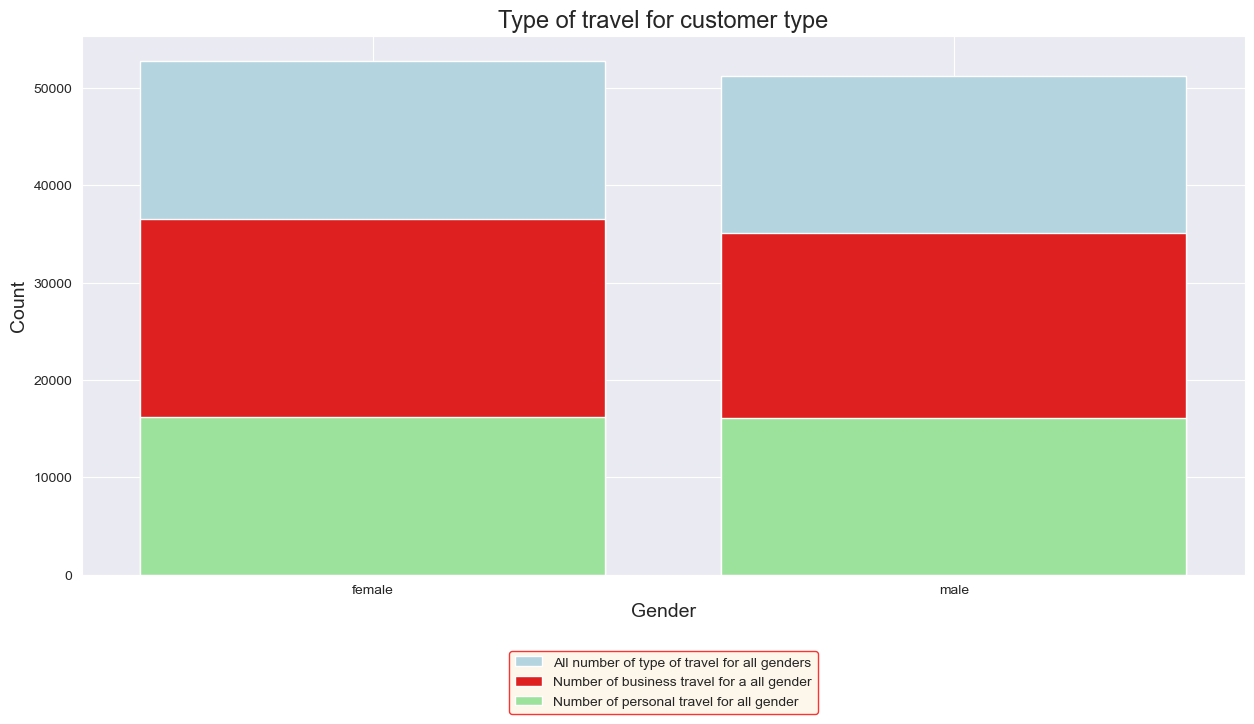

In [74]:
plt.figure(figsize=(15, 7))
plt.title('Type of travel and Gender', fontsize=17)
sns.set_style('darkgrid')
sns.barplot(data=train.groupby('gender')['satisfaction'].count().reset_index(),
            x='gender',
            y='satisfaction',
            color='lightblue', 
            label = "All number of type of travel for all genders")
sns.barplot(data=train.query('(type_of_travel == "business travel")').groupby('gender')['satisfaction'].count().reset_index(),
            x='gender',
            y='satisfaction',
            color='red',
            label = "Number of business travel for a all gender")
sns.barplot(data=train.query('(type_of_travel == "personal travel")').groupby('gender')['satisfaction'].count().reset_index(),
            x='gender',
            y='satisfaction',
            color='lightgreen', 
            label = "Number of personal travel for all gender")
plt.ylabel('Count', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.grid(True)
plt.legend(edgecolor = 'r',
           facecolor = 'oldlace',
           loc='center', 
           bbox_to_anchor=(0.5, -0.20));

**Both men and women have the same number of business and personal trips**

## Gender and customer type

**Given the conclusion above, let's test the hypothesis that there are more regular customers**

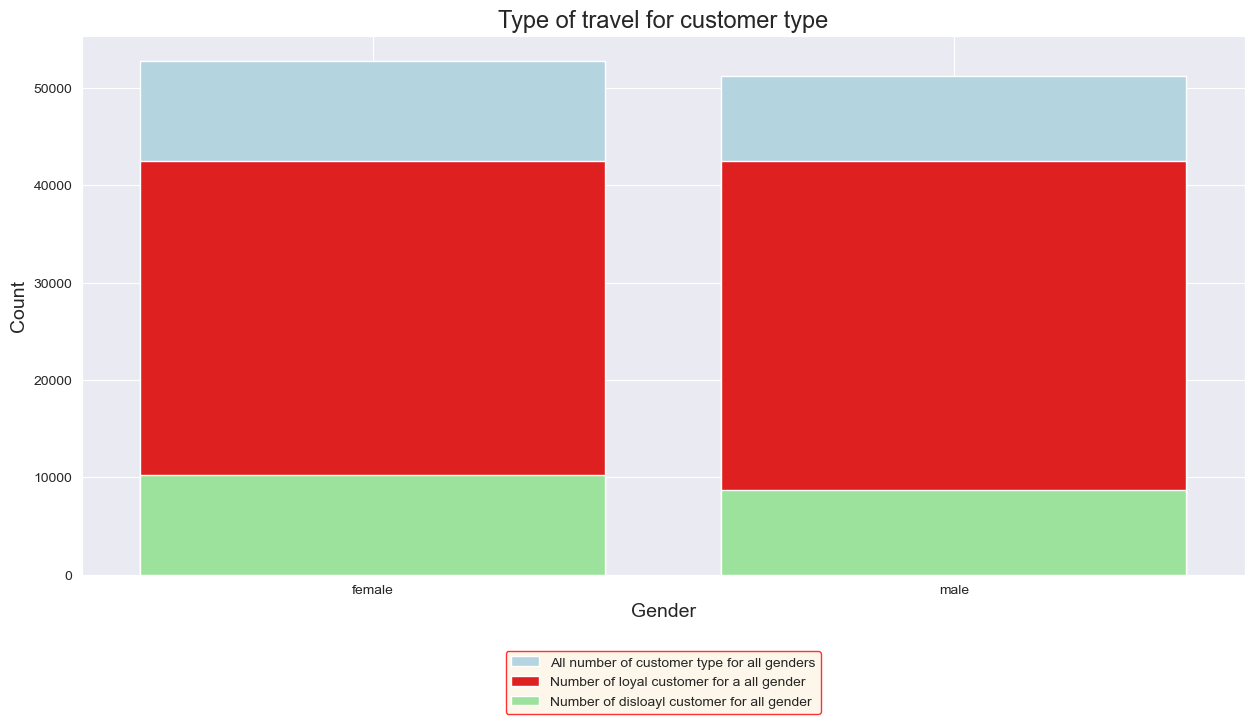

In [75]:
plt.figure(figsize=(15, 7))
plt.title('Gender and customer type', fontsize=17)
sns.set_style('darkgrid')
sns.barplot(data=train.groupby('gender')['satisfaction'].count().reset_index(),
            x='gender',
            y='satisfaction',
            color='lightblue', 
            label = "All number of customer type for all genders")
sns.barplot(data=train.query('(customer_type == "loyal customer")').groupby('gender')['satisfaction'].count().reset_index(),
            x='gender',
            y='satisfaction',
            color='red',
            label = "Number of loyal customer for a all gender")
sns.barplot(data=train.query('(customer_type == "disloyal customer")').groupby('gender')['satisfaction'].count().reset_index(),
            x='gender',
            y='satisfaction',
            color='lightgreen', 
            label = "Number of disloayl customer for all gender")
plt.ylabel('Count', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.grid(True)
plt.legend(edgecolor = 'r',
           facecolor = 'oldlace',
           loc='center', 
           bbox_to_anchor=(0.5, -0.20));

**There are most regular customers.**

## Conclusion

 - **There are more regular customers**

 - **As the age increases, the number of regular customers grows.**

 - **More and more business trips are made, and the older the passengers, the more business trips.**

 - **The gender of passengers does not affect the type and number of trips**

# Task part №2 content

Assignment (you can start on Dec, 11)

1. Create new features based on your EDA. Don't forget to check how they performed after you are finished with modelling! You can use ``feature_importances`` from scikit-learn or use advanced methods like SHAP or Lime. (5 points)
2. Your target variable is ``satisfaction``. You should research metrics and choose one or multiple that you will use to validate your model. Write down the formula(s) and your motivation to use them. (3 points)
2. Design the validation process: for example, will you use cross-validation or just train-test split? Will you account for the imbalance in classes, if it exists? (2 points)
3. Experiment with modelling. You can use models from the lecture or do your own research. You can also try out approaches like stacking and blending – will they increase the quality? (15 points)
4. Make predictions on the test.csv dataset.

# Part №2 Task №1.New features

## Create new features

### Discard unnecessary for other

In [76]:
train.drop(['age_group'], axis=1, inplace=True)
test.drop(['age_group'], axis=1, inplace=True)

**Since we only evaluate the signs in this block, we will not delete anything except for age intervals**

**There is a high Pearson correlation indicator between the signs of delayed departure and delayed arrival, we will create an additional sign of "total lost time" in addition to the categories created in Part No. 1 Task No. 2 to get rid of multicollinarity**

**And in addition, we will create age categories, perhaps simplifying this feature will improve the quality of Logistic regression**

In [77]:
train['total_loss_time'] = train['departure_delay_in_minutes'] + train['arrival_delay_in_minutes']
test['total_loss_time'] = test['departure_delay_in_minutes'] + test['arrival_delay_in_minutes']
train['age_categories'] = pd.cut(train['age'], bins=list(range(0,91,10)), 
                                 labels=[8, 7, 6, 5, 4, 3, 2, 1, 0], include_lowest=True, right=False).astype(int)
test['age_categories'] = pd.cut(test['age'], bins=list(range(0,91,10)), 
                                 labels=[8, 7 ,6, 5, 4, 3, 2, 1, 0], include_lowest=True, right=False).astype(int)

## Corellation

In [78]:
encoder = OrdinalEncoder()
train_for_matrix = train.copy()
train_for_matrix[['gender', 'customer_type', 'type_of_travel', 'class', 'satisfaction']] = encoder.fit_transform(train[['gender', 'customer_type', 'type_of_travel', 'class', 'satisfaction']])

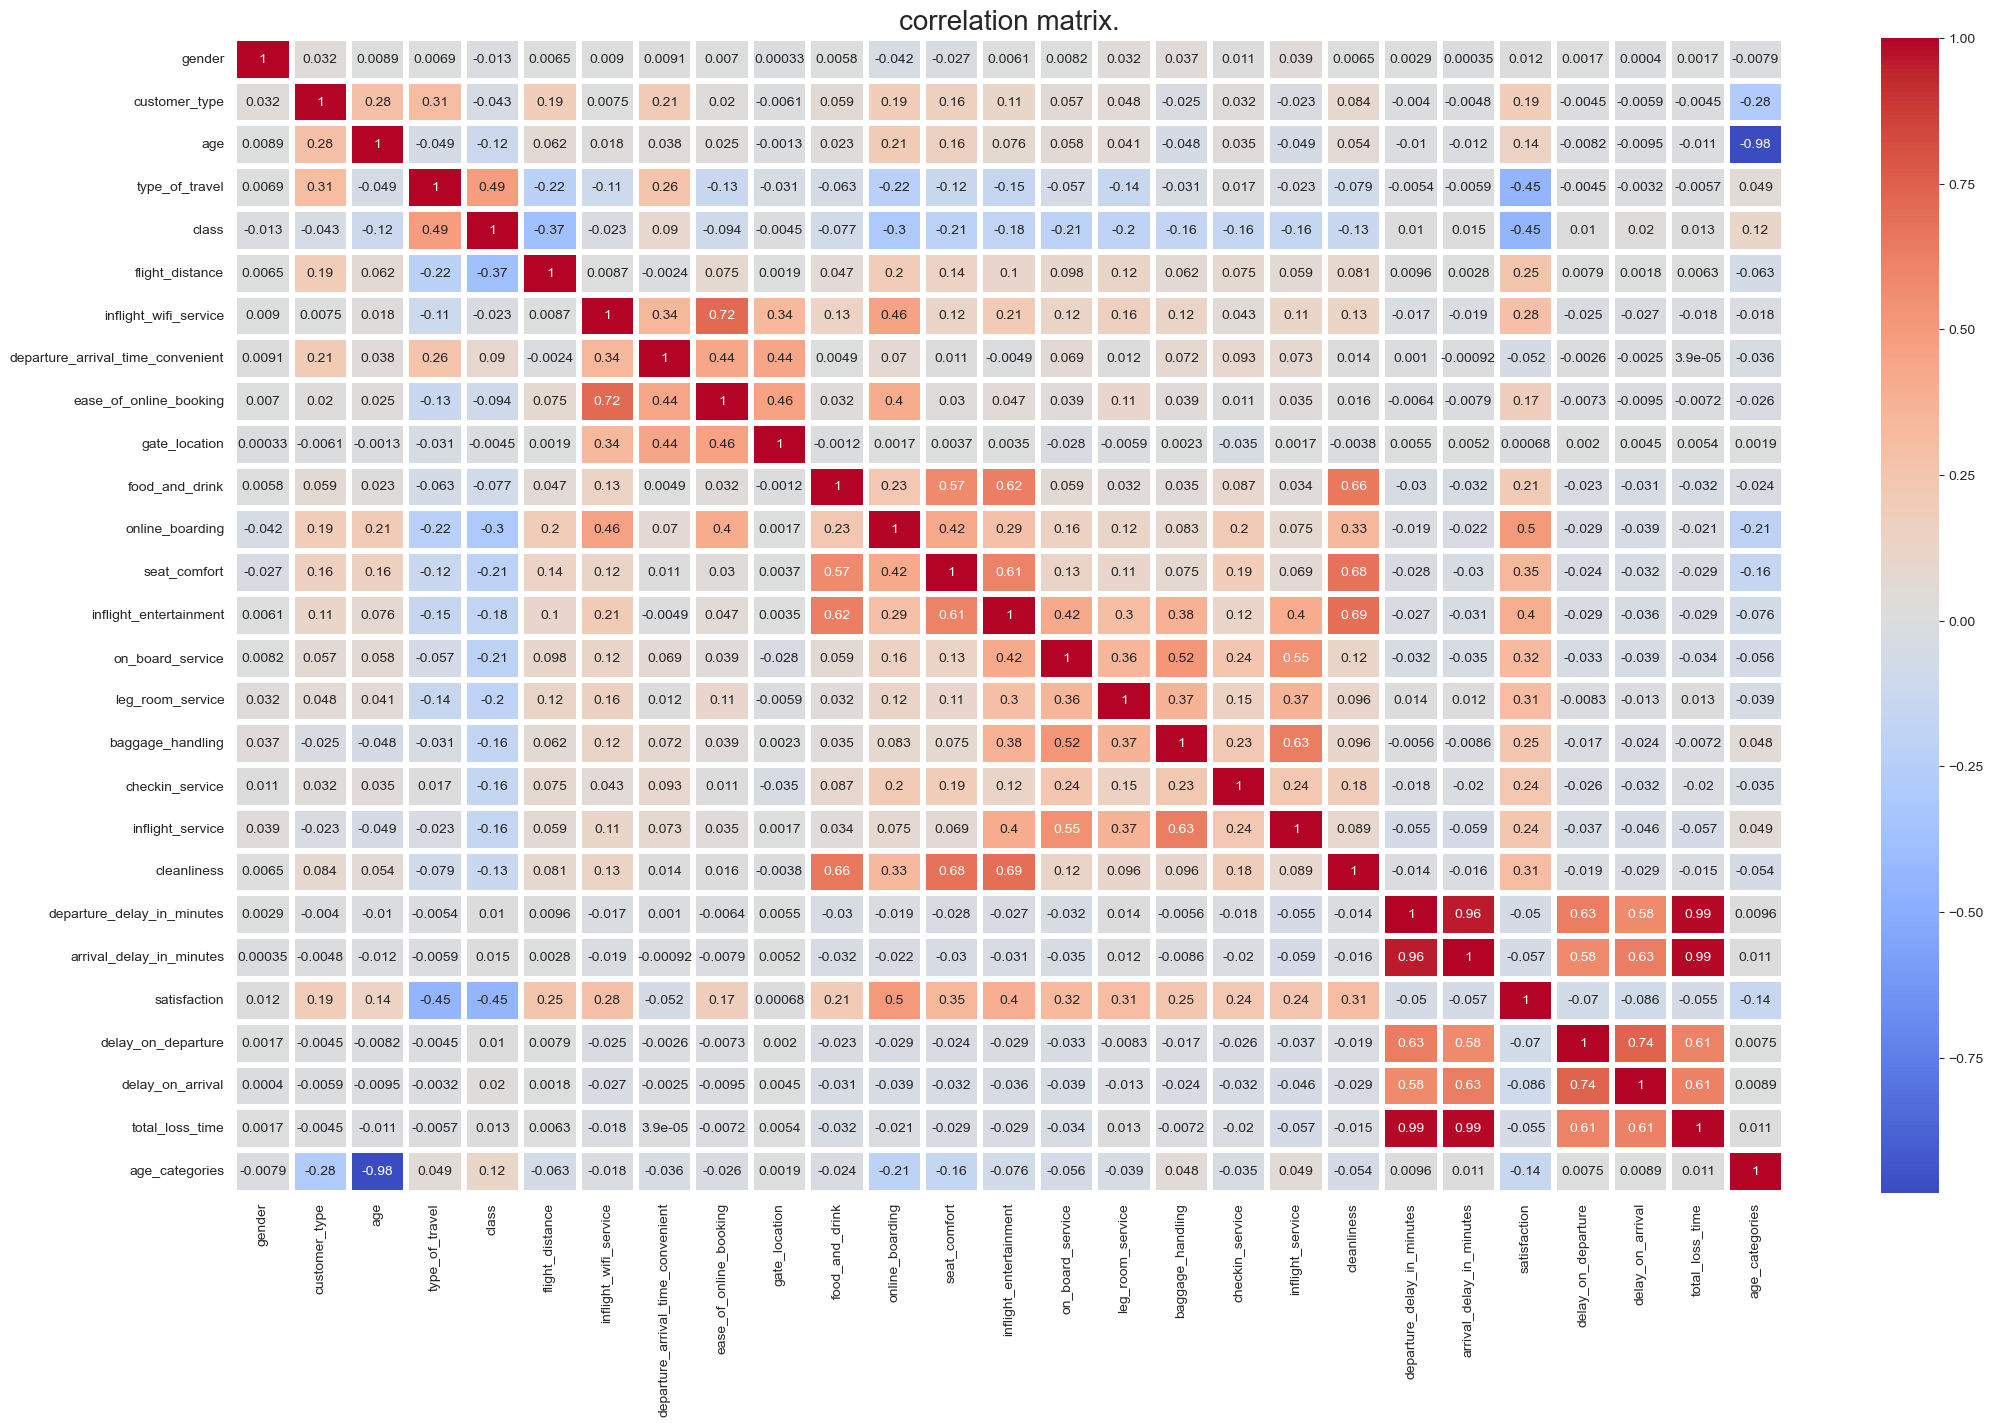

In [79]:
fig, ax = plt.subplots(figsize=(25,15))
plt.title('correlation matrix.', fontsize=20)
sns.heatmap(train_for_matrix.corr(), annot=True, cmap="coolwarm",  fmt='.2g', linewidth=4)
plt.grid(True);

## The importance of feature for simple models

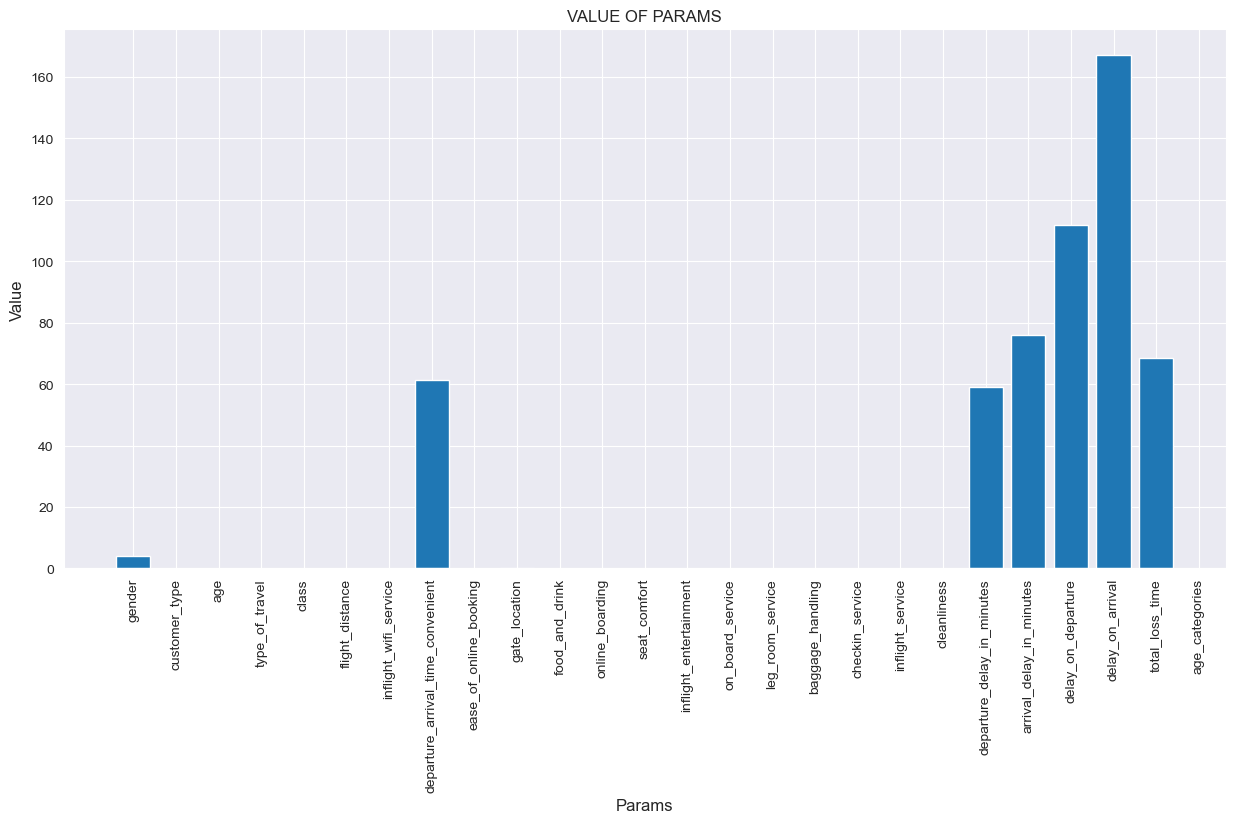

In [80]:
plt.figure(figsize=(15, 7))
plt.title('VALUE OF PARAMS', fontsize=12)
selector = SelectKBest(f_classif, k='all')
selector.fit(train_for_matrix[train_for_matrix.drop('satisfaction', axis=1).columns.to_list()],
             train_for_matrix["satisfaction"])
scores = -np.log10(selector.pvalues_)
plt.bar(range(len(train_for_matrix.drop('satisfaction', axis=1).columns.to_list())), scores)
plt.xticks(range(len(train_for_matrix.drop('satisfaction', axis=1).columns.to_list())),
           train_for_matrix.drop('satisfaction', axis=1).columns.to_list(),
           rotation='vertical')
plt.ylabel('Value', fontsize=12)
plt.xlabel('Params', fontsize=12)
plt.grid(True)
sns.set_style('darkgrid')
plt.show(True);

In [81]:
del train_for_matrix

## The importance of feature for CatboostClassifier

In [82]:
train_for_cat = train.copy()
test_for_cat = test.copy()

In [83]:
train_for_cat['satisfaction'].replace({'neutral or dissatisfied': 0 , 'satisfied':1}, inplace=True)
test_for_cat['satisfaction'].replace({'neutral or dissatisfied': 0 , 'satisfied':1}, inplace=True)

In [84]:
features_for_cat = train_for_cat.drop('satisfaction', axis=1)
target_for_cat = train_for_cat['satisfaction']

**categorical attributes we will pass a special parameter**

In [85]:
features_index = np.where((features_for_cat.dtypes != float) & (features_for_cat.dtypes != int))[0]

In [86]:
cat = CatBoostClassifier(loss_function='Logloss',
                         eval_metric='Accuracy',
                         random_seed=42,
                         verbose=False)

cat.fit(features_for_cat, target_for_cat, cat_features=features_index)

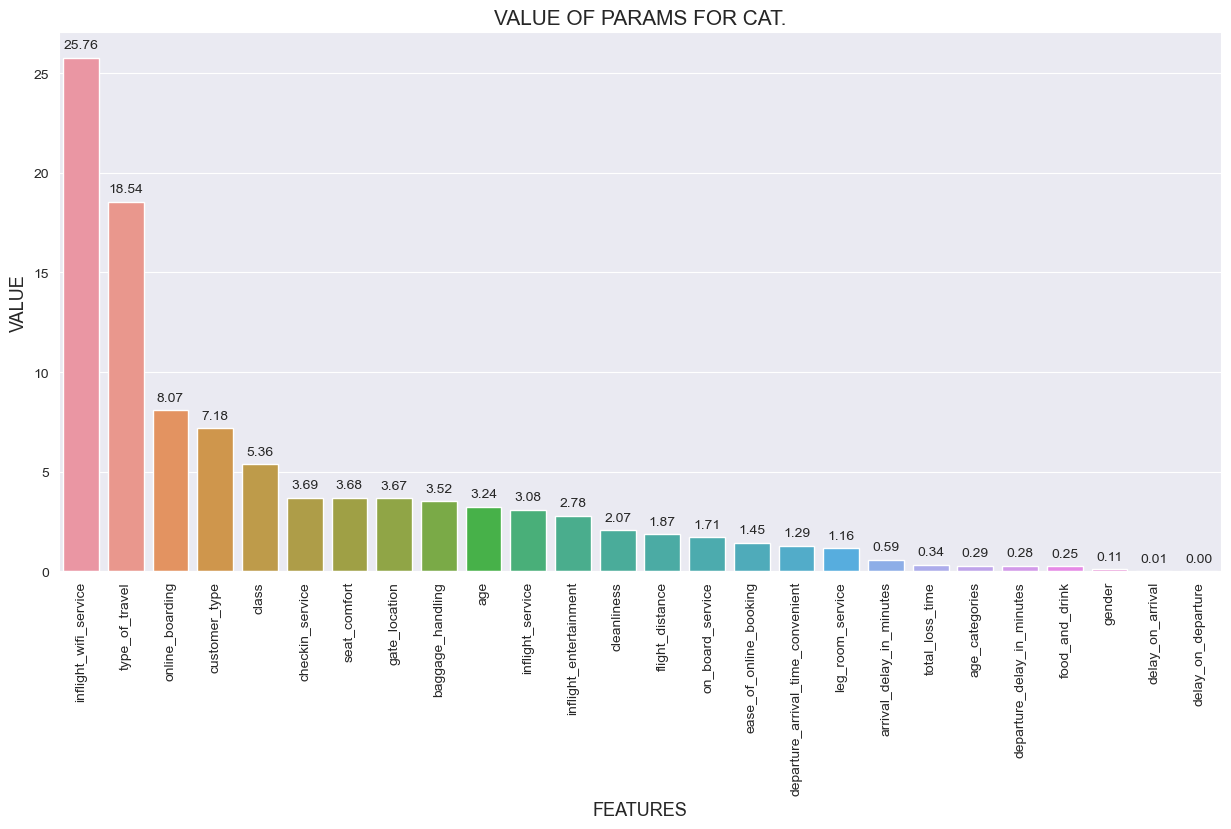

In [87]:
importances_features_for_cat = cat.get_feature_importance(Pool(features_for_cat, target_for_cat, cat_features=features_index), prettified = True)

plt.figure(figsize=[15, 7])
sns.set_style('darkgrid')
plt.title('VALUE OF PARAMS FOR CAT.', fontsize=15)
splot = sns.barplot(x='Feature Id', y='Importances', data=importances_features_for_cat.reset_index())
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel('VALUE', fontsize=13)
plt.xlabel('FEATURES', fontsize=13)
plt.xticks(rotation=90);

In [88]:
del cat, features_index, importances_features_for_cat, splot, features_for_cat, target_for_cat, train_for_cat, test_for_cat

# Part №2 Task №2.Metrics

**To evaluate the model, we will use the accuracy metric indicator as an accuracy estimate, the roc_auc indicator and f1_score as classifier quality indicators. Roc_auc takes into account the false triggering of the model based on the values of true positive responses(TPR) and false positive responses(FPR). The harmonic mean (f1 of the world) gives an understanding of what accuracy the model achieves and at what completeness.**

# Part №3 Task №3.Validation

**For each model, we will create separate data sets in accordance with the features of the model**

In [89]:
train_target = train['satisfaction']
test_target = test['satisfaction']

train.drop(['satisfaction'], axis=1, inplace=True)
test.drop(['satisfaction'], axis=1, inplace=True)

train_target.replace({'neutral or dissatisfied': 0 , 'satisfied':1}, inplace=True)
test_target.replace({'neutral or dissatisfied': 0 , 'satisfied':1}, inplace=True)

In [90]:
train['delay_on_departure'] = train['delay_on_departure'].astype('category')
train['delay_on_arrival'] = train['delay_on_arrival'].astype('category')

test['delay_on_departure'] = test['delay_on_departure'].astype('category')
test['delay_on_arrival'] = test['delay_on_arrival'].astype('category')

## For LogisticRegression

In [91]:
features_for_lr_train = train.copy()
features_for_lr_test = test.copy()

features_for_lr_train.drop(['departure_delay_in_minutes', 'arrival_delay_in_minutes', 'age_categories', 'delay_on_departure', 'delay_on_arrival'], axis=1, inplace=True)
features_for_lr_test.drop(['departure_delay_in_minutes', 'arrival_delay_in_minutes', 'age_categories', 'delay_on_departure', 'delay_on_arrival'], axis=1, inplace=True)

columns_for_lr_train = features_for_lr_train.columns.tolist()
columns_for_lr_test = features_for_lr_test.columns.tolist()

In [92]:
encoder = OrdinalEncoder()
features_for_lr_train[['gender', 'customer_type', 'type_of_travel', 'class']] = encoder.fit_transform(features_for_lr_train[['gender', 'customer_type', 'type_of_travel', 'class']])
features_for_lr_test[['gender', 'customer_type', 'type_of_travel', 'class']] = encoder.transform(features_for_lr_test[['gender', 'customer_type', 'type_of_travel', 'class']])

In [93]:
scaler = StandardScaler()
for column in features_for_lr_train.columns:
    features_for_lr_train[column] = scaler.fit_transform(features_for_lr_train[column].values.reshape(-1, 1))
    features_for_lr_test[column] = scaler.fit_transform(features_for_lr_test[column].values.reshape(-1, 1))

In [94]:
features_for_lr_train = csr_matrix(features_for_lr_train)
features_for_lr_test = csr_matrix(features_for_lr_test)

In [95]:
print('LR TRAIN MATRIX')
pd.DataFrame.sparse.from_spmatrix(features_for_lr_train, columns=columns_for_lr_train).head(2)

LR TRAIN MATRIX


,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,total_loss_time
0,1.015031,0.472767,-1.745279,1.490614,2.264618,-0.624953,0.203579,0.616172,0.173776,-1.547323,...,-0.185532,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,1.156436,1.305870,0.171470
1,1.015031,-2.115208,-0.951360,-0.670865,-0.957054,-1.356251,0.203579,-0.695245,0.173776,0.018094,...,-0.185532,-1.849315,-1.769081,-1.849161,1.25338,-0.535045,-1.821012,0.305848,-1.742292,-0.301515


In [96]:
print('LR TEST MATRIX')
pd.DataFrame.sparse.from_spmatrix(features_for_lr_test, columns=columns_for_lr_test).head(2)

LR TEST MATRIX


,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,total_loss_time
0,-0.985932,0.47604,0.817887,-0.663378,0.652923,-1.778267,1.703853,0.621641,0.172143,0.797831,...,0.544692,-0.340303,1.227138,1.259170,1.250974,1.161716,-1.035348,1.144063,1.298998,0.877719
1,-0.985932,0.47604,-0.239238,-0.663378,-0.950436,1.365173,-1.291598,-1.334871,0.172143,-1.542065,...,0.544692,1.174774,0.479907,0.479178,0.492730,0.311739,-0.247517,0.297077,1.298998,-0.391595


In [97]:
print(f'SIZE TRAIN FEATURES FOR LR - {features_for_lr_train.shape}, SIZE TEST FEATURES FOR LR - {features_for_lr_test.shape}')
print(f'SIZE TRAIN TARGET FOR LR - {train_target.shape}, SIZE TEST TARGET FOR LR - {test_target.shape}')

SIZE TRAIN FEATURES FOR LR - (103904, 21), SIZE TEST FEATURES FOR LR - (25976, 21)
SIZE TRAIN TARGET FOR LR - (103904,), SIZE TEST TARGET FOR LR - (25976,)


In [98]:
del encoder, scaler, columns_for_lr_train, columns_for_lr_test

## For Random Forest

In [99]:
features_for_rf_train = train.copy()
features_for_rf_test = test.copy()

features_for_rf_train.drop(['age', 'departure_delay_in_minutes', 'arrival_delay_in_minutes', 'total_loss_time'], axis=1, inplace=True)
features_for_rf_test.drop(['age', 'departure_delay_in_minutes', 'arrival_delay_in_minutes', 'total_loss_time'], axis=1, inplace=True)


features_for_rf_train = pd.get_dummies(features_for_rf_train, 
                                       columns=['gender', 'customer_type', 'type_of_travel', 'class',
                                                'inflight_wifi_service', 'departure_arrival_time_convenient',
                                                'ease_of_online_booking', 'food_and_drink',
                                                'online_boarding','inflight_entertainment',
                                                'on_board_service', 'leg_room_service', 'baggage_handling',
                                                'inflight_service', 'cleanliness',
                                                'delay_on_departure', 'delay_on_arrival', 'age_categories'], 
                                       drop_first=True)

features_for_rf_test = pd.get_dummies(features_for_rf_test, 
                                      columns=['gender', 'customer_type', 'type_of_travel', 'class',
                                               'inflight_wifi_service', 'departure_arrival_time_convenient',
                                               'ease_of_online_booking', 'food_and_drink',
                                               'online_boarding', 'inflight_entertainment',
                                               'on_board_service', 'leg_room_service', 'baggage_handling',
                                               'inflight_service', 'cleanliness',
                                               'delay_on_departure', 'delay_on_arrival', 'age_categories'], 
                                       drop_first=True)

In [100]:
print('Features for TRAIN RF')
features_for_rf_train.head(2)

Features for TRAIN RF


,flight_distance,gate_location,seat_comfort,checkin_service,gender_male,customer_type_loyal customer,type_of_travel_personal travel,class_eco,class_eco plus,inflight_wifi_service_1,...,delay_on_departure_1,delay_on_arrival_1,age_categories_1,age_categories_2,age_categories_3,age_categories_4,age_categories_5,age_categories_6,age_categories_7,age_categories_8
0,6.133398,1,5,4,1,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
1,5.463832,3,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [101]:
print('Features for TEST RF')
features_for_rf_test.head(2)

Features for TEST RF


,flight_distance,gate_location,seat_comfort,checkin_service,gender_male,customer_type_loyal customer,type_of_travel_personal travel,class_eco,class_eco plus,inflight_wifi_service_1,...,delay_on_departure_1,delay_on_arrival_1,age_categories_1,age_categories_2,age_categories_3,age_categories_4,age_categories_5,age_categories_6,age_categories_7,age_categories_8
0,5.081404,4,3,2,0,1,0,1,0,0,...,1,1,0,0,1,0,0,0,0,0
1,7.959975,1,5,3,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [102]:
print(f'SIZE TRAIN FEATURES FOR RF - {features_for_rf_train.shape}, SIZE TEST FEATURES FOR RF - {features_for_rf_test.shape}')
print(f'SIZE TRAIN TARGET FOR RF - {train_target.shape}, SIZE TEST TARGET FOR RF - {test_target.shape}')

SIZE TRAIN FEATURES FOR RF - (103904, 73), SIZE TEST FEATURES FOR RF - (25976, 73)
SIZE TRAIN TARGET FOR RF - (103904,), SIZE TEST TARGET FOR RF - (25976,)


## For CatboostClassfier

In [462]:
features_for_cat_train = train.copy()
features_for_cat_test = test.copy()

features_for_cat_train.drop(['age_categories', 'delay_on_departure', 'delay_on_arrival', 'total_loss_time'], axis=1, inplace=True)
features_for_cat_test.drop(['age_categories', 'delay_on_departure', 'delay_on_arrival', 'total_loss_time'], axis=1, inplace=True)

In [463]:
cat_features_index = np.where(features_for_cat_train.dtypes == 'category')[0]
print('CAT FEATURES INDEX:', cat_features_index)

CAT FEATURES INDEX: [0 1 3 4]


In [464]:
x_train_cat, x_valid_cat, y_train_cat, y_valid_cat = train_test_split(features_for_cat_train, train_target, 
                                                                      test_size=0.20, 
                                                                      random_state=42)

In [465]:
print(f'SIZE TRAIN FEATURES FOR CAT - {features_for_cat_train.shape}, SIZE TEST FEATURES FOR CAT - {features_for_cat_test.shape}')
print(f'SIZE TRAIN TARGET FOR CAT - {train_target.shape}, SIZE TEST TARGET FOR CAT - {test_target.shape}')

SIZE TRAIN FEATURES FOR CAT - (103904, 22), SIZE TEST FEATURES FOR CAT - (25976, 22)
SIZE TRAIN TARGET FOR CAT - (103904,), SIZE TEST TARGET FOR CAT - (25976,)


## CROSS-VALIDATION

**To validate the model, we will use CM, use train_test_split, we do not see it as significant, since there is a target feature in the test dataset, it will check the models of the MC on the test dataset**

In [107]:
dct_with_models_for_cv = {}

In [108]:
%%time
for label_model, model in {'RF': [RandomForestClassifier(random_state=42)],
                           'LR': [LogisticRegression(random_state=42)],
                           'CAT': [CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy', 
                                                      verbose=False, use_best_model=True, random_seed=42)]}.items():
    if label_model == 'LR':
        scores = cross_val_score(model[0], features_for_lr_train, train_target, cv=3, scoring='accuracy')
        model[0].fit(features_for_lr_train, train_target)
        dct_with_models_for_cv[f'{label_model}_overall_accuracy_on_train'] = np.mean(scores)
        dct_with_models_for_cv[f'{label_model}_accuracy_for_test_with_default_params'] = accuracy_score(test_target, model[0].predict(features_for_lr_test))    
        dct_with_models_for_cv[f'{label_model}_roc_auc_for_test_with_default_params'] = roc_auc_score(test_target, model[0].predict_proba(features_for_lr_test)[:,1])
        dct_with_models_for_cv[f'{label_model}_f1_score_for_test_with_default_params'] = f1_score(test_target, model[0].predict(features_for_lr_test), average='binary')
    elif label_model == 'RF':
        scores = cross_val_score(model[0], features_for_rf_train, train_target, cv=3, scoring='accuracy')
        model[0].fit(features_for_rf_train, train_target)
        dct_with_models_for_cv[f'{label_model}_overall_accuracy_on_train'] = np.mean(scores)
        dct_with_models_for_cv[f'{label_model}_accuracy_for_test_with_default_params'] = accuracy_score(test_target, model[0].predict(features_for_rf_test))    
        dct_with_models_for_cv[f'{label_model}_roc_auc_for_test_with_default_params'] = roc_auc_score(test_target, model[0].predict_proba(features_for_rf_test)[:,1])
        dct_with_models_for_cv[f'{label_model}_f1_score_for_test_with_default_params'] = f1_score(test_target, model[0].predict(features_for_rf_test), average='binary')
    elif label_model == 'CAT':
        scores = cv(Pool(features_for_cat_train, train_target, cat_features=cat_features_index),
                    {"loss_function": "Logloss",
                     "eval_metric": "Accuracy",
                     "verbose": False,
                     "random_seed": 42},
                     fold_count=3)       
        model[0].fit(x_train_cat, y_train_cat,
                     cat_features=cat_features_index,
                     eval_set=(x_valid_cat, y_valid_cat),
                     verbose=True,
                     plot=False)
        dct_with_models_for_cv[f'{label_model}_overall_accuracy_on_train'] = scores['test-Accuracy-mean'].mean()
        dct_with_models_for_cv[f'{label_model}_accuracy_for_test_with_default_params'] = accuracy_score(test_target, model[0].predict(features_for_cat_test))    
        dct_with_models_for_cv[f'{label_model}_roc_auc_for_test_with_default_params'] = roc_auc_score(test_target, model[0].predict_proba(features_for_cat_test)[:,1])
        dct_with_models_for_cv[f'{label_model}_f1_score_for_test_with_default_params'] = f1_score(test_target, model[0].predict(features_for_cat_test), average='binary') 

Learning rate set to 0.094424
0:	learn: 0.9063436	test: 0.9084741	best: 0.9084741 (0)	total: 30.7ms	remaining: 30.7s
1:	learn: 0.9054774	test: 0.9067899	best: 0.9084741 (0)	total: 56.8ms	remaining: 28.3s
2:	learn: 0.9094835	test: 0.9113132	best: 0.9113132 (2)	total: 86.9ms	remaining: 28.9s
3:	learn: 0.9215741	test: 0.9240171	best: 0.9240171 (3)	total: 114ms	remaining: 28.4s
4:	learn: 0.9282148	test: 0.9293585	best: 0.9293585 (4)	total: 145ms	remaining: 28.9s
5:	learn: 0.9294900	test: 0.9300804	best: 0.9300804 (5)	total: 171ms	remaining: 28.3s
6:	learn: 0.9329067	test: 0.9315721	best: 0.9315721 (6)	total: 201ms	remaining: 28.5s
7:	learn: 0.9362270	test: 0.9348443	best: 0.9348443 (7)	total: 230ms	remaining: 28.5s
8:	learn: 0.9359864	test: 0.9351331	best: 0.9351331 (8)	total: 256ms	remaining: 28.2s
9:	learn: 0.9379233	test: 0.9373947	best: 0.9373947 (9)	total: 281ms	remaining: 27.8s
10:	learn: 0.9393068	test: 0.9387421	best: 0.9387421 (10)	total: 306ms	remaining: 27.5s
11:	learn: 0.942121

97:	learn: 0.9616592	test: 0.9601559	best: 0.9605890 (93)	total: 2.62s	remaining: 24.1s
98:	learn: 0.9616833	test: 0.9602522	best: 0.9605890 (93)	total: 2.65s	remaining: 24.1s
99:	learn: 0.9616713	test: 0.9602040	best: 0.9605890 (93)	total: 2.67s	remaining: 24.1s
100:	learn: 0.9617434	test: 0.9603003	best: 0.9605890 (93)	total: 2.69s	remaining: 24s
101:	learn: 0.9619239	test: 0.9604928	best: 0.9605890 (93)	total: 2.72s	remaining: 24s
102:	learn: 0.9618517	test: 0.9606852	best: 0.9606852 (102)	total: 2.74s	remaining: 23.9s
103:	learn: 0.9619480	test: 0.9605890	best: 0.9606852 (102)	total: 2.77s	remaining: 23.9s
104:	learn: 0.9620081	test: 0.9606371	best: 0.9606852 (102)	total: 2.79s	remaining: 23.8s
105:	learn: 0.9620201	test: 0.9606371	best: 0.9606852 (102)	total: 2.82s	remaining: 23.8s
106:	learn: 0.9620923	test: 0.9607334	best: 0.9607334 (106)	total: 2.84s	remaining: 23.7s
107:	learn: 0.9620562	test: 0.9606371	best: 0.9607334 (106)	total: 2.88s	remaining: 23.7s
108:	learn: 0.9621284	

195:	learn: 0.9655330	test: 0.9624657	best: 0.9626582 (186)	total: 5s	remaining: 20.5s
196:	learn: 0.9656292	test: 0.9623695	best: 0.9626582 (186)	total: 5.02s	remaining: 20.5s
197:	learn: 0.9655932	test: 0.9625620	best: 0.9626582 (186)	total: 5.04s	remaining: 20.4s
198:	learn: 0.9656172	test: 0.9625138	best: 0.9626582 (186)	total: 5.07s	remaining: 20.4s
199:	learn: 0.9656052	test: 0.9625620	best: 0.9626582 (186)	total: 5.09s	remaining: 20.4s
200:	learn: 0.9656413	test: 0.9626582	best: 0.9626582 (186)	total: 5.12s	remaining: 20.4s
201:	learn: 0.9657135	test: 0.9627063	best: 0.9627063 (201)	total: 5.14s	remaining: 20.3s
202:	learn: 0.9656894	test: 0.9625620	best: 0.9627063 (201)	total: 5.17s	remaining: 20.3s
203:	learn: 0.9657135	test: 0.9626101	best: 0.9627063 (201)	total: 5.2s	remaining: 20.3s
204:	learn: 0.9657736	test: 0.9627063	best: 0.9627063 (201)	total: 5.22s	remaining: 20.2s
205:	learn: 0.9658458	test: 0.9628026	best: 0.9628026 (205)	total: 5.25s	remaining: 20.2s
206:	learn: 0.

294:	learn: 0.9682398	test: 0.9634281	best: 0.9634763 (288)	total: 7.37s	remaining: 17.6s
295:	learn: 0.9682639	test: 0.9632356	best: 0.9634763 (288)	total: 7.4s	remaining: 17.6s
296:	learn: 0.9682759	test: 0.9634281	best: 0.9634763 (288)	total: 7.42s	remaining: 17.6s
297:	learn: 0.9682759	test: 0.9634281	best: 0.9634763 (288)	total: 7.45s	remaining: 17.6s
298:	learn: 0.9682639	test: 0.9634763	best: 0.9634763 (288)	total: 7.48s	remaining: 17.5s
299:	learn: 0.9683000	test: 0.9634763	best: 0.9634763 (288)	total: 7.5s	remaining: 17.5s
300:	learn: 0.9683120	test: 0.9634763	best: 0.9634763 (288)	total: 7.52s	remaining: 17.5s
301:	learn: 0.9684684	test: 0.9634281	best: 0.9634763 (288)	total: 7.54s	remaining: 17.4s
302:	learn: 0.9685286	test: 0.9634763	best: 0.9634763 (288)	total: 7.57s	remaining: 17.4s
303:	learn: 0.9685165	test: 0.9634763	best: 0.9634763 (288)	total: 7.59s	remaining: 17.4s
304:	learn: 0.9685165	test: 0.9634763	best: 0.9634763 (288)	total: 7.62s	remaining: 17.4s
305:	learn: 

393:	learn: 0.9706459	test: 0.9631875	best: 0.9638612 (338)	total: 9.73s	remaining: 15s
394:	learn: 0.9706459	test: 0.9631875	best: 0.9638612 (338)	total: 9.76s	remaining: 14.9s
395:	learn: 0.9707061	test: 0.9631394	best: 0.9638612 (338)	total: 9.78s	remaining: 14.9s
396:	learn: 0.9707181	test: 0.9630913	best: 0.9638612 (338)	total: 9.81s	remaining: 14.9s
397:	learn: 0.9707662	test: 0.9631394	best: 0.9638612 (338)	total: 9.83s	remaining: 14.9s
398:	learn: 0.9707542	test: 0.9631394	best: 0.9638612 (338)	total: 9.86s	remaining: 14.8s
399:	learn: 0.9707542	test: 0.9631394	best: 0.9638612 (338)	total: 9.88s	remaining: 14.8s
400:	learn: 0.9707662	test: 0.9631394	best: 0.9638612 (338)	total: 9.9s	remaining: 14.8s
401:	learn: 0.9707542	test: 0.9631394	best: 0.9638612 (338)	total: 9.93s	remaining: 14.8s
402:	learn: 0.9707301	test: 0.9631875	best: 0.9638612 (338)	total: 9.96s	remaining: 14.7s
403:	learn: 0.9707422	test: 0.9631875	best: 0.9638612 (338)	total: 9.98s	remaining: 14.7s
404:	learn: 0

493:	learn: 0.9720294	test: 0.9632838	best: 0.9638612 (338)	total: 12.1s	remaining: 12.4s
494:	learn: 0.9720896	test: 0.9633319	best: 0.9638612 (338)	total: 12.1s	remaining: 12.4s
495:	learn: 0.9721016	test: 0.9633319	best: 0.9638612 (338)	total: 12.1s	remaining: 12.3s
496:	learn: 0.9721738	test: 0.9634281	best: 0.9638612 (338)	total: 12.2s	remaining: 12.3s
497:	learn: 0.9721617	test: 0.9634281	best: 0.9638612 (338)	total: 12.2s	remaining: 12.3s
498:	learn: 0.9721617	test: 0.9635725	best: 0.9638612 (338)	total: 12.2s	remaining: 12.3s
499:	learn: 0.9721617	test: 0.9635725	best: 0.9638612 (338)	total: 12.3s	remaining: 12.3s
500:	learn: 0.9721738	test: 0.9634281	best: 0.9638612 (338)	total: 12.3s	remaining: 12.2s
501:	learn: 0.9721978	test: 0.9633319	best: 0.9638612 (338)	total: 12.3s	remaining: 12.2s
502:	learn: 0.9721738	test: 0.9634763	best: 0.9638612 (338)	total: 12.3s	remaining: 12.2s
503:	learn: 0.9722099	test: 0.9632838	best: 0.9638612 (338)	total: 12.3s	remaining: 12.2s
504:	learn

592:	learn: 0.9737377	test: 0.9635244	best: 0.9639093 (549)	total: 14.7s	remaining: 10.1s
593:	learn: 0.9737137	test: 0.9635244	best: 0.9639093 (549)	total: 14.7s	remaining: 10.1s
594:	learn: 0.9737618	test: 0.9635244	best: 0.9639093 (549)	total: 14.7s	remaining: 10s
595:	learn: 0.9737257	test: 0.9637650	best: 0.9639093 (549)	total: 14.8s	remaining: 10s
596:	learn: 0.9737377	test: 0.9637169	best: 0.9639093 (549)	total: 14.8s	remaining: 9.98s
597:	learn: 0.9737497	test: 0.9637650	best: 0.9639093 (549)	total: 14.8s	remaining: 9.96s
598:	learn: 0.9737618	test: 0.9638612	best: 0.9639093 (549)	total: 14.8s	remaining: 9.94s
599:	learn: 0.9737738	test: 0.9639093	best: 0.9639093 (549)	total: 14.9s	remaining: 9.91s
600:	learn: 0.9738460	test: 0.9639093	best: 0.9639093 (549)	total: 14.9s	remaining: 9.88s
601:	learn: 0.9738099	test: 0.9637650	best: 0.9639093 (549)	total: 14.9s	remaining: 9.86s
602:	learn: 0.9737738	test: 0.9636206	best: 0.9639093 (549)	total: 14.9s	remaining: 9.83s
603:	learn: 0.

689:	learn: 0.9751332	test: 0.9637650	best: 0.9639093 (549)	total: 17s	remaining: 7.65s
690:	learn: 0.9751332	test: 0.9637650	best: 0.9639093 (549)	total: 17s	remaining: 7.62s
691:	learn: 0.9751453	test: 0.9637650	best: 0.9639093 (549)	total: 17.1s	remaining: 7.6s
692:	learn: 0.9751814	test: 0.9637650	best: 0.9639093 (549)	total: 17.1s	remaining: 7.57s
693:	learn: 0.9752054	test: 0.9638612	best: 0.9639093 (549)	total: 17.1s	remaining: 7.55s
694:	learn: 0.9752054	test: 0.9638612	best: 0.9639093 (549)	total: 17.1s	remaining: 7.52s
695:	learn: 0.9752174	test: 0.9638612	best: 0.9639093 (549)	total: 17.2s	remaining: 7.5s
696:	learn: 0.9752054	test: 0.9637650	best: 0.9639093 (549)	total: 17.2s	remaining: 7.47s
697:	learn: 0.9752174	test: 0.9637650	best: 0.9639093 (549)	total: 17.2s	remaining: 7.44s
698:	learn: 0.9752054	test: 0.9637169	best: 0.9639093 (549)	total: 17.2s	remaining: 7.42s
699:	learn: 0.9752174	test: 0.9637169	best: 0.9639093 (549)	total: 17.3s	remaining: 7.39s
700:	learn: 0.97

788:	learn: 0.9761678	test: 0.9630913	best: 0.9639093 (549)	total: 19.4s	remaining: 5.19s
789:	learn: 0.9761919	test: 0.9631394	best: 0.9639093 (549)	total: 19.4s	remaining: 5.16s
790:	learn: 0.9762160	test: 0.9631394	best: 0.9639093 (549)	total: 19.4s	remaining: 5.14s
791:	learn: 0.9761919	test: 0.9631875	best: 0.9639093 (549)	total: 19.5s	remaining: 5.11s
792:	learn: 0.9762039	test: 0.9631875	best: 0.9639093 (549)	total: 19.5s	remaining: 5.09s
793:	learn: 0.9762400	test: 0.9631394	best: 0.9639093 (549)	total: 19.5s	remaining: 5.06s
794:	learn: 0.9762641	test: 0.9631875	best: 0.9639093 (549)	total: 19.5s	remaining: 5.04s
795:	learn: 0.9762641	test: 0.9630913	best: 0.9639093 (549)	total: 19.6s	remaining: 5.01s
796:	learn: 0.9762761	test: 0.9631875	best: 0.9639093 (549)	total: 19.6s	remaining: 4.99s
797:	learn: 0.9763002	test: 0.9632356	best: 0.9639093 (549)	total: 19.6s	remaining: 4.96s
798:	learn: 0.9762882	test: 0.9632356	best: 0.9639093 (549)	total: 19.6s	remaining: 4.94s
799:	learn

883:	learn: 0.9773107	test: 0.9630913	best: 0.9639093 (549)	total: 21.7s	remaining: 2.85s
884:	learn: 0.9773228	test: 0.9631394	best: 0.9639093 (549)	total: 21.7s	remaining: 2.82s
885:	learn: 0.9773348	test: 0.9630913	best: 0.9639093 (549)	total: 21.8s	remaining: 2.8s
886:	learn: 0.9773468	test: 0.9631875	best: 0.9639093 (549)	total: 21.8s	remaining: 2.77s
887:	learn: 0.9774190	test: 0.9633800	best: 0.9639093 (549)	total: 21.8s	remaining: 2.75s
888:	learn: 0.9774190	test: 0.9633800	best: 0.9639093 (549)	total: 21.8s	remaining: 2.73s
889:	learn: 0.9774190	test: 0.9633319	best: 0.9639093 (549)	total: 21.9s	remaining: 2.7s
890:	learn: 0.9774190	test: 0.9632838	best: 0.9639093 (549)	total: 21.9s	remaining: 2.67s
891:	learn: 0.9775032	test: 0.9631875	best: 0.9639093 (549)	total: 21.9s	remaining: 2.65s
892:	learn: 0.9775273	test: 0.9632356	best: 0.9639093 (549)	total: 21.9s	remaining: 2.63s
893:	learn: 0.9775032	test: 0.9631875	best: 0.9639093 (549)	total: 22s	remaining: 2.6s
894:	learn: 0.9

981:	learn: 0.9789830	test: 0.9632838	best: 0.9639093 (549)	total: 24.3s	remaining: 446ms
982:	learn: 0.9790190	test: 0.9632356	best: 0.9639093 (549)	total: 24.3s	remaining: 421ms
983:	learn: 0.9790551	test: 0.9632356	best: 0.9639093 (549)	total: 24.4s	remaining: 396ms
984:	learn: 0.9790912	test: 0.9631875	best: 0.9639093 (549)	total: 24.4s	remaining: 371ms
985:	learn: 0.9790792	test: 0.9631875	best: 0.9639093 (549)	total: 24.4s	remaining: 347ms
986:	learn: 0.9790792	test: 0.9631875	best: 0.9639093 (549)	total: 24.4s	remaining: 322ms
987:	learn: 0.9790672	test: 0.9631875	best: 0.9639093 (549)	total: 24.4s	remaining: 297ms
988:	learn: 0.9790672	test: 0.9631875	best: 0.9639093 (549)	total: 24.5s	remaining: 272ms
989:	learn: 0.9790672	test: 0.9631875	best: 0.9639093 (549)	total: 24.5s	remaining: 247ms
990:	learn: 0.9790431	test: 0.9632356	best: 0.9639093 (549)	total: 24.5s	remaining: 223ms
991:	learn: 0.9790551	test: 0.9631875	best: 0.9639093 (549)	total: 24.5s	remaining: 198ms
992:	learn

In [109]:
model = []
overall_accuracy_on_train = []
accuracy_for_test_with_default_params = []
roc_auc_for_test_with_default_params = []
f1_for_test_with_default_params = []

for name_model in ['RF', 'LR', 'CAT']:
    model.append(name_model)
    overall_accuracy_on_train.append(dct_with_models_for_cv[f'{name_model}_overall_accuracy_on_train'])
    accuracy_for_test_with_default_params.append(dct_with_models_for_cv[f'{name_model}_accuracy_for_test_with_default_params'])
    roc_auc_for_test_with_default_params.append(dct_with_models_for_cv[f'{name_model}_roc_auc_for_test_with_default_params'])
    f1_for_test_with_default_params.append(dct_with_models_for_cv[f'{label_model}_f1_score_for_test_with_default_params'])

In [110]:
results = {
    'Model' : model,
    'OVERALL ACCURACY FOR TRAIN DATASET' : pd.Series(overall_accuracy_on_train),
    'ROC_AUC FOR TEST WITH DEFAULT PARAMS' : pd.Series(roc_auc_for_test_with_default_params),
    'ACCURACY FOR TEST WITH DEFAULT PARAMS' : pd.Series(accuracy_for_test_with_default_params),
    'F1_SCORE FOR TEST WITH DEFAULT PARAMS' : pd.Series(f1_for_test_with_default_params)}

display(pd.DataFrame(results).style.highlight_max(color='green'))

,Model,OVERALL ACCURACY FOR TRAIN DATASET,ROC_AUC FOR TEST WITH DEFAULT PARAMS,ACCURACY FOR TEST WITH DEFAULT PARAMS,F1_SCORE FOR TEST WITH DEFAULT PARAMS
0,RF,0.956133,0.992307,0.958962,0.958620
1,LR,0.875212,0.925347,0.871343,0.958620
2,CAT,0.958733,0.995294,0.964159,0.958620


In [111]:
del dct_with_models_for_cv, model, scores, overall_accuracy_on_train, accuracy_for_test_with_default_params, roc_auc_for_test_with_default_params, f1_for_test_with_default_params

# Part №3 Task №4.Experiment with modelling

**Consider the target attribute**

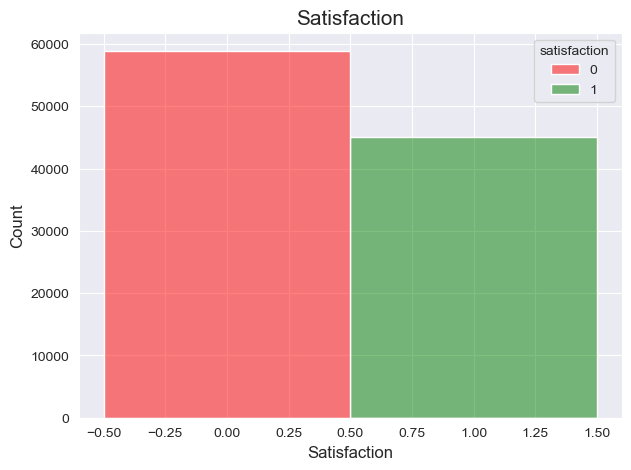

In [112]:
plt.figure(figsize=(7, 5))
plt.title('Satisfaction', fontsize=15)
sns.set_style('darkgrid')
sns.histplot(data=train_target.reset_index(), x='satisfaction', hue='satisfaction', palette=['red', 'green'], legend=True)
plt.grid(True)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Satisfaction', fontsize=12);

**There is an imbalance of the target class in the set, we use the class_weight='balanced' parameter**

## **FIND BEST PARAMS FOR MODELS AND TEST**

**Now let's try to adjust the results of the models by selecting parameters**

In [113]:
dct_with_models_for_grid = {}

In [114]:
%%time
c = np.logspace(-1,1,10)
for label_model, model in {'RF': {'classifier': [RandomForestClassifier(random_state=42)],
                                  'preprocessing': [None],
                                  'classifier__n_estimators': [50, 60],
                                  'classifier__max_depth': [8,10,15,20],
                                  'classifier__min_samples_split': [4,5,8,10],
                                  'classifier__min_samples_leaf': [4,6,8,10],
                                  'classifier__class_weight':['balanced', None]},
                           'LR': {'classifier': [LogisticRegression(random_state=42)],
                                  'preprocessing': [None],
                                  'classifier__C': c,
                                  'classifier__max_iter': [50,100,150,200],
                                  'classifier__class_weight':['balanced', None]}}.items():
    
        if label_model == 'LR':
            pipe = Pipeline([('preprocessing', None), ('classifier', None)])
            grid = GridSearchCV(pipe, model, cv=3, scoring='accuracy')
            grid.fit(features_for_lr_train, train_target)
            dct_with_models_for_grid[f'{label_model}_params'] = grid.best_params_
            dct_with_models_for_grid[f'{label_model}_accuracy_grid_train_with_best_params'] = grid.best_score_
            dct_with_models_for_grid[f'{label_model}_accuracy_for_test_with_best_params'] = accuracy_score(test_target, grid.predict(features_for_lr_test))    
            dct_with_models_for_grid[f'{label_model}_roc_auc_for_test_with_best_params'] = roc_auc_score(test_target, grid.predict_proba(features_for_lr_test)[:,1])
            dct_with_models_for_grid[f'{label_model}_f1_score_for_test_with_best_params'] = f1_score(test_target, grid.predict(features_for_lr_test), average='binary')
        elif label_model == 'RF':
            pipe = Pipeline([('preprocessing', None), ('classifier', None)])
            grid = GridSearchCV(pipe, model, cv=3, scoring='accuracy')
            grid.fit(features_for_rf_train, train_target)
            dct_with_models_for_grid[f'{label_model}_params'] = grid.best_params_
            dct_with_models_for_grid[f'{label_model}_accuracy_grid_train_with_best_params'] = grid.best_score_
            dct_with_models_for_grid[f'{label_model}_accuracy_for_test_with_best_params'] = accuracy_score(test_target, grid.predict(features_for_rf_test))    
            dct_with_models_for_grid[f'{label_model}_roc_auc_for_test_with_best_params'] = roc_auc_score(test_target, grid.predict_proba(features_for_rf_test)[:,1])
            dct_with_models_for_grid[f'{label_model}_f1_score_for_test_with_best_params'] = f1_score(test_target, grid.predict(features_for_rf_test), average='binary')

CPU times: user 34min 45s, sys: 38.5 s, total: 35min 23s
Wall time: 35min 45s


In [115]:
%%time
cat_for_search = CatBoostClassifier(loss_function='Logloss',
                                    eval_metric='Accuracy',
                                    verbose=False,
                                    random_state=12345)

params = {'depth': [5,6,7,8,9,10],
          'auto_class_weights':['Balanced', None]}

grid = cat_for_search.grid_search(params, Pool(features_for_cat_train, train_target, cat_features=cat_features_index),
                                  shuffle=True, cv=3, verbose=False,  plot=False)

dct_with_models_for_grid['CAT_params'] = grid['params']
cat = CatBoostClassifier(depth=dct_with_models_for_grid['CAT_params']['depth'],
                         auto_class_weights=dct_with_models_for_grid['CAT_params']['auto_class_weights'],
                         loss_function='Logloss',
                         eval_metric='Accuracy',
                         verbose=False,
                         random_seed=42,
                         use_best_model=True)
cat.fit(x_train_cat, y_train_cat,
        cat_features=cat_features_index,
        eval_set = (x_valid_cat, y_valid_cat))

dct_with_models_for_grid['CAT_accuracy_grid_train_with_best_params'] = cat.get_best_score()['validation']['Accuracy']                      
dct_with_models_for_grid['CAT_accuracy_for_test_with_best_params'] = accuracy_score(test_target, cat.predict(features_for_cat_test))
dct_with_models_for_grid['CAT_roc_auc_for_test_with_best_params'] = roc_auc_score(test_target, cat.predict_proba(features_for_cat_test)[:,1])
dct_with_models_for_grid['CAT_f1_score_for_test_with_best_params'] = f1_score(test_target, cat.predict(features_for_cat_test), average='binary')


bestTest = 0.9614860818
bestIteration = 983


bestTest = 0.9623577635
bestIteration = 952


bestTest = 0.9632261789
bestIteration = 564


bestTest = 0.9642317131
bestIteration = 870


bestTest = 0.9639933885
bestIteration = 677


bestTest = 0.9637452693
bestIteration = 606


bestTest = 0.9623349097
bestIteration = 587


bestTest = 0.9622696147
bestIteration = 284


Iteration with suspicious time 1.55e+04 sec ignored in overall statistics.
CPU times: user 1h 47min 21s, sys: 50min 19s, total: 2h 37min 40s
Wall time: 4h 29min 6s


In [118]:
dct_with_models_for_grid

{'RF_params': {'classifier': RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                         n_estimators=50, random_state=42),
  'classifier__class_weight': None,
  'classifier__max_depth': 20,
  'classifier__min_samples_leaf': 4,
  'classifier__min_samples_split': 10,
  'classifier__n_estimators': 50,
  'preprocessing': None},
 'RF_accuracy_grid_train_with_best_params': 0.9509836234867874,
 'RF_accuracy_for_test_with_best_params': 0.9540729904527256,
 'RF_roc_auc_for_test_with_best_params': 0.991590562529099,
 'RF_f1_score_for_test_with_best_params': 0.9467719627002186,
 'LR_params': {'classifier': LogisticRegression(C=0.1, max_iter=50, random_state=42),
  'classifier__C': 0.1,
  'classifier__class_weight': None,
  'classifier__max_iter': 50,
  'preprocessing': None},
 'LR_accuracy_grid_train_with_best_params': 0.87513477104472,
 'LR_accuracy_for_test_with_best_params': 0.8713812750230983,
 'LR_roc_auc_for_test_with_best_params': 0.925343190068

In [116]:
model = []
accuracy_grid_train_with_best_params = []
accuracy_for_test_with_best_params = []
roc_auc_for_test_with_best_params = []
f1_score_for_test_with_best_params = []

for name_model in ['RF', 'LR', 'CAT']:
    model.append(name_model)
    accuracy_grid_train_with_best_params.append(dct_with_models_for_grid[f'{name_model}_accuracy_grid_train_with_best_params'])
    accuracy_for_test_with_best_params.append(dct_with_models_for_grid[f'{name_model}_accuracy_for_test_with_best_params'])
    roc_auc_for_test_with_best_params.append(dct_with_models_for_grid[f'{name_model}_roc_auc_for_test_with_best_params'])
    f1_score_for_test_with_best_params.append(dct_with_models_for_grid[f'{name_model}_f1_score_for_test_with_best_params'])

In [119]:
results['ACCURACY FOR TRAIN WITH BEST PARAMS'] = pd.Series(accuracy_grid_train_with_best_params)
results['ROC_AUC FOR TEST WITH BEST PARAMS'] = pd.Series(roc_auc_for_test_with_best_params)
results['ACCURACY FOR TEST WITH BEST PARAMS'] = pd.Series(accuracy_for_test_with_best_params)
results['F1_SCORE FOR TEST WITH BEST PARAMS'] = pd.Series(f1_score_for_test_with_best_params)
display(pd.DataFrame(results).style.highlight_max(color='green'))

,Model,OVERALL ACCURACY FOR TRAIN DATASET,ROC_AUC FOR TEST WITH DEFAULT PARAMS,ACCURACY FOR TEST WITH DEFAULT PARAMS,F1_SCORE FOR TEST WITH DEFAULT PARAMS,ACCURACY FOR TRAIN WITH BEST PARAMS,ROC_AUC FOR TEST WITH BEST PARAMS,ACCURACY FOR TEST WITH BEST PARAMS,F1_SCORE FOR X_TEST WITH BEST PARAMS
0,RF,0.956133,0.992307,0.958962,0.958620,0.950984,0.991591,0.954073,0.946772
1,LR,0.875212,0.925347,0.871343,0.958620,0.875135,0.925343,0.871381,0.850159
2,CAT,0.958733,0.995294,0.964159,0.958620,0.961760,0.995292,0.963659,0.958274


In [120]:
del features_for_lr_train, features_for_lr_test, features_for_rf_train, features_for_rf_test, grid, cat, pipe, params

In [121]:
del accuracy_grid_train_with_best_params, accuracy_for_test_with_best_params, roc_auc_for_test_with_best_params, f1_score_for_test_with_best_params

## **Best threshold**

**Let's try to improve the result of the best model by selecting the classification threshold**

In [122]:
best_model = CatBoostClassifier(depth=dct_with_models_for_grid['CAT_params']['depth'],
                                auto_class_weights=dct_with_models_for_grid['CAT_params']['auto_class_weights'],
                                loss_function='Logloss',
                                eval_metric='Accuracy',
                                use_best_model=True,
                                random_seed=42,
                                verbose=False)

best_model.fit(x_train_cat, y_train_cat,
               cat_features=cat_features_index,
               eval_set = (x_valid_cat, y_valid_cat))

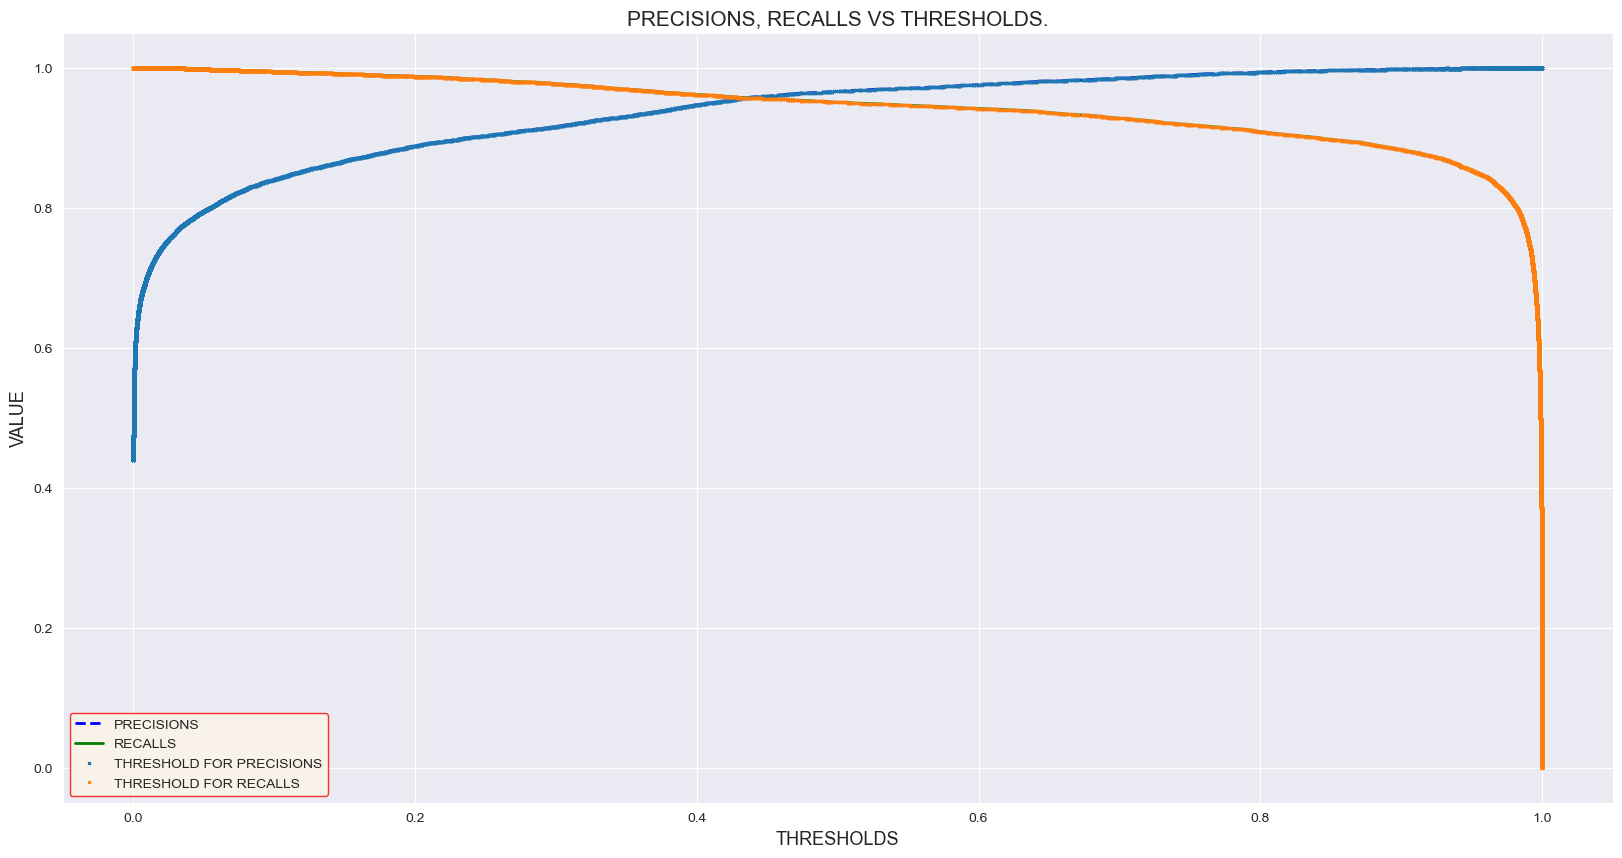

In [123]:
predictions = best_model.predict(features_for_cat_test)
probalities = best_model.predict_proba(features_for_cat_test)
probalities_one = probalities[:,1]

plt.figure(figsize=[20, 10])
plt.title('PRECISIONS, RECALLS VS THRESHOLDS.', fontsize=15)
precisions, recalls, thresholds = precision_recall_curve(test_target, probalities_one)
plt.plot(thresholds, precisions[:-1], 'b--', label='PRECISIONS', linewidth=2)
plt.plot(thresholds, recalls[:-1],'g-', label='RECALLS', linewidth=2)
plt.plot(thresholds, precisions[:-1], 'x', label='THRESHOLD FOR PRECISIONS', markersize=2)
plt.plot(thresholds, recalls[:-1],'x', label='THRESHOLD FOR RECALLS', markersize=2)

sns.set_style('darkgrid')
plt.ylabel('VALUE', fontsize=13)
plt.xlabel('THRESHOLDS', fontsize=13)
plt.grid(True)
plt.legend(edgecolor = 'r',
           facecolor = 'oldlace')
plt.show();

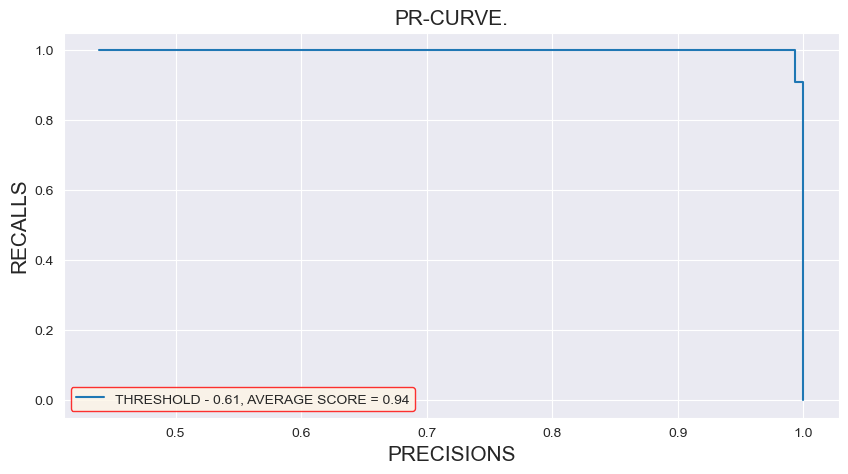

In [466]:
best_accuracy = 0
best_threshold = 0

probalities = best_model.predict_proba(features_for_cat_test)
probabilities_one_valid = probalities[:,1]
for threshold in np.arange(0.1, 0.9, 0.1):
    predicted_valid = probabilities_one_valid > threshold
    accuracy = accuracy_score(test_target, predicted_valid)
    if (accuracy > best_accuracy):
        best_accuracy = accuracy
        best_threshold = threshold
        if (best_threshold >= 0.1 ):
            min_boundary = best_threshold - 0.05
            max_boundary = best_threshold + 0.05
            for updated_threshold in np.arange(min_boundary, max_boundary, 0.01):
                predicted_valid = probabilities_one_valid > updated_threshold
                accuracy = accuracy_score(test_target, predicted_valid)
                if (accuracy > best_accuracy):
                    best_accuracy = accuracy
                    best_threshold = updated_threshold

                        
plt.figure(figsize=[10, 5])
plt.title('PR-CURVE.', fontsize=15)
precisions, recalls, thresholds = precision_recall_curve(test_target, predicted_valid)
average_score = average_precision_score(test_target, predicted_valid)
plt.step(precisions, recalls, 
         label=f"THRESHOLD - {best_threshold}, AVERAGE SCORE = {average_score:.2f}", where='post')
sns.set_style('darkgrid')
plt.grid(True)
plt.xlabel('PRECISIONS', fontsize=15)
plt.ylabel('RECALLS', fontsize=15)
plt.legend(edgecolor = 'r',
           facecolor = 'oldlace')
plt.show();

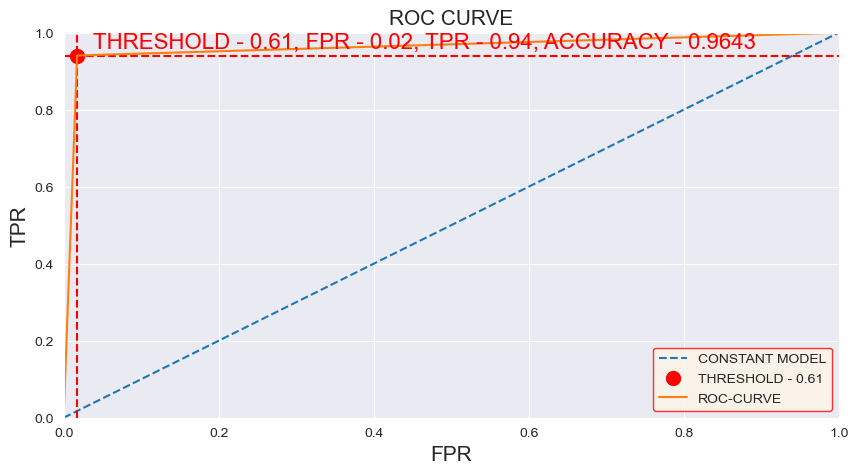

In [125]:
plt.figure(figsize=[10, 5])
plt.title('ROC CURVE', fontsize=15)
predictions = best_model.predict(features_for_cat_test)
probalities = best_model.predict_proba(features_for_cat_test)
probalities_one = probalities[:,1]
predicted_valid = probalities_one > best_threshold
auc_roc = roc_auc_score(predictions, predicted_valid)
plt.plot([0,1],[0,1], linestyle ='--', label='CONSTANT MODEL')
fpr, tpr, all_thresholds = roc_curve(test_target, predicted_valid)
plt.text((fpr[1] + 0.02),(tpr[1] + 0.02), 
         f'THRESHOLD - {best_threshold}, FPR - {fpr[1]:.2f}, TPR - {tpr[1]:.2f}, ACCURACY - {best_accuracy:.4f}',
         color='r',
         fontsize=16)
plt.plot(fpr[1],tpr[1], 
         'o',
         color='r',
         label=f'THRESHOLD - {best_threshold}', markersize=10)
plt.axvline(x=fpr[1], color='r', linestyle='--')
plt.axhline(y=tpr[1], color='r', linestyle='--')
plt.plot(fpr, tpr, label=f'ROC-CURVE')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.legend(edgecolor = 'r',
           facecolor = 'oldlace')
plt.show()

In [126]:
del dct_with_models_for_grid, features_for_cat_train

**BEST MODEL IS CATBOOST CLASSIFIER WITH ACCURACY 0.9642747**

## And now let's test the neural network for the result

In [446]:
features_for_keras_train = train.copy()
features_for_keras_test = test.copy()

In [447]:
features_for_keras_train.drop(['total_loss_time', 'age_categories',
                               'departure_delay_in_minutes' , 'arrival_delay_in_minutes'], axis=1, inplace=True)
features_for_keras_test.drop(['total_loss_time', 'age_categories',
                              'departure_delay_in_minutes' , 'arrival_delay_in_minutes'], axis=1, inplace=True)

In [448]:
encoder = OrdinalEncoder()
features_for_keras_train[['gender', 'customer_type', 'type_of_travel', 'class']] = \
encoder.fit_transform(features_for_keras_train[['gender', 'customer_type', 'type_of_travel', 'class']])

features_for_keras_test[['gender', 'customer_type', 'type_of_travel', 'class']] = \
encoder.transform(features_for_keras_test[['gender', 'customer_type', 'type_of_travel', 'class']])

In [449]:
del encoder

In [450]:
scaler = StandardScaler()
for column in features_for_keras_train.columns:
    features_for_keras_train[column] = scaler.fit_transform(features_for_keras_train[column].values.reshape(-1, 1))
    features_for_keras_test[column] = scaler.transform(features_for_keras_test[column].values.reshape(-1, 1))

In [451]:
del scaler

In [452]:
features_for_keras_train = np.array(features_for_keras_train.select_dtypes(include=np.number))
features_for_keras_test = np.array(features_for_keras_test.select_dtypes(include=np.number))

train_target_keras = np.array(train_target)
test_target_keras = np.array(test_target)

In [453]:
print(f'SIZE TRAIN FEATURES FOR CAT - {features_for_keras_train.shape}, SIZE TEST FEATURES FOR CAT - {features_for_keras_test.shape}')
print(f'SIZE TRAIN TARGET FOR CAT - {train_target_keras.shape}, SIZE TEST TARGET FOR CAT - {test_target_keras.shape}')

SIZE TRAIN FEATURES FOR CAT - (103904, 22), SIZE TEST FEATURES FOR CAT - (25976, 22)
SIZE TRAIN TARGET FOR CAT - (103904,), SIZE TEST TARGET FOR CAT - (25976,)


In [454]:
x_train_keras, x_valid_keras, y_train_keras, y_valid_keras = train_test_split(features_for_keras_train, train_target_keras, 
                                                                              test_size=0.20, 
                                                                              random_state=42)

In [455]:
model = Sequential()
model.add(Dense(units=100, input_dim=features_for_keras_train.shape[1], activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [456]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(
    x_train_keras,
    y_train_keras,
    epochs=10,
    verbose=False,
    validation_data=(x_valid_keras, y_valid_keras)
)

In [457]:
yhat = (model.predict(features_for_keras_test) > 0.5).astype('int8')

812/812 [==============================] - 1s 858us/step


In [458]:
score = accuracy_score(test_target_keras, yhat)
print('Accuracy score for keras:', score)

Accuracy score for keras: 0.9620033877425316


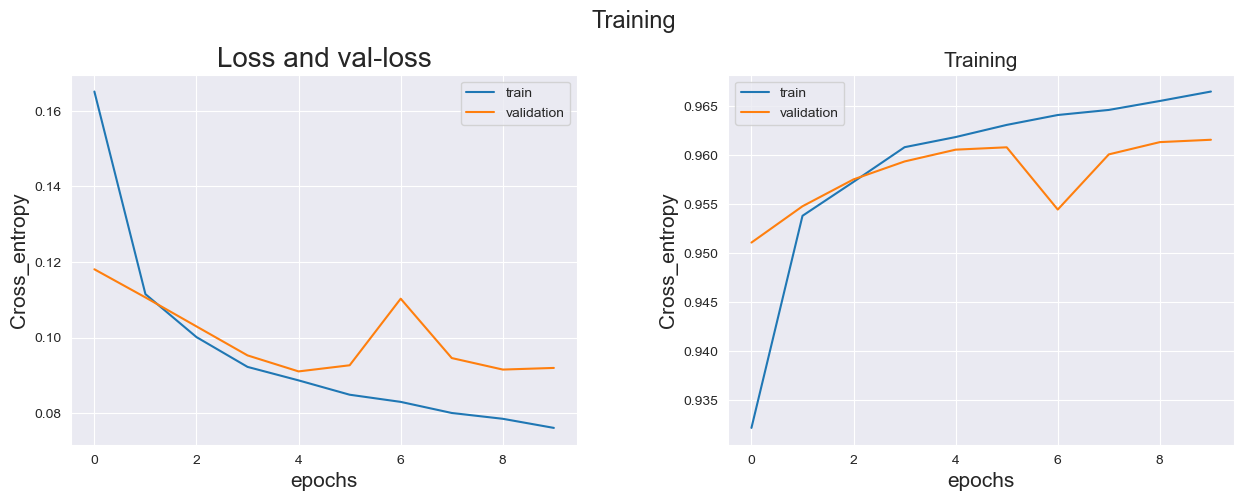

In [459]:
plt.figure(figsize=[15, 5])
plt.subplots_adjust(top=0.85, wspace=0.3, hspace=0.95)
plt.grid(True)
plt.suptitle('Training', fontsize=17)
plt.subplot(1, 2, 1)
plt.title('Loss and val-loss', fontsize=20)
plt.xlabel('epochs', fontsize=15)
plt.ylabel('Cross_entropy', fontsize=15)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.subplot(1, 2, 2)
plt.title('Acc and val-acc', fontsize=20)
plt.title('Training', fontsize=15)
plt.xlabel('epochs', fontsize=15)
plt.ylabel('Cross_entropy', fontsize=15)
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.show();

In [460]:
best_accuracy_keras = 0
best_threshold_keras = 0

for threshold in np.arange(0.1, 0.9, 0.1):
    yhat = (model.predict(features_for_keras_test) > threshold).astype('int8')
    accuracy = accuracy_score(test_target_keras, yhat)
    if (accuracy > best_accuracy_keras):
        best_accuracy_keras = accuracy
        best_threshold_keras = threshold
        if (best_threshold >= 0.1 ):
            min_boundary = best_threshold - 0.05
            max_boundary = best_threshold + 0.05
            for updated_threshold in np.arange(min_boundary, max_boundary, 0.01):
                yhat = (model.predict(features_for_keras_test) > updated_threshold).astype('int8')
                accuracy = accuracy_score(test_target_keras, yhat)
                if (accuracy > best_accuracy_keras):
                    best_accuracy_keras = accuracy
                    best_threshold_keras = updated_threshold

812/812 [==============================] - 1s 608us/step


In [461]:
print('\nBEST ACCURACY SCORE FOR KERAS -', best_accuracy_keras)
print('\nBEST THERSHOLD - ', best_threshold_keras)


BEST ACCURACY SCORE FOR KERAS - 0.9621188789651987

BEST THERSHOLD -  0.48000000000000004


## REPORT

**BEST MODEL IS CATBOOST CLASSIFIER WITH ACCURACY 0.9642747**

# Part №3 Task №5.Predictions

In [ ]:
test = pd.read_csv('/Users/greygreywolf/Downloads/ML_bootcamp_task/test.csv')
f_id = test.iloc[:,0].values

In [ ]:
probalities = best_model.predict_proba(test_for_cat)
probalities_one = probalities[:,1]
predicted_valid = probalities_one > best_treshold
predictions = predicted_valid.astype(np.int)
output = pd.DataFrame(data={'id': f_id, 'Satisfaction': predictions})
print(output.shape)

In [ ]:
filename = '/Users/greygreywolf/Downloads/Predictions.csv'
output.to_csv(filename,index=False)
print('Saved file: ' + filename)